# **Feature Peaks PLS**

This notebook is for the analysis of the data that are produced from peaks_PLS.py. 

It is divided into:
1. **Concatenated movie:**
- Emotions peaks
- Peaks from features extracted
- Mean of the peaks from features extracted
2. **Single movie:**
- Emotions peaks
- Peaks from features extracted
- Mean of the peaks from emotions (normalized)
- Scaffolds and Triangles
- Functional Networks for BOLD, Scaffolds and Triangles


### **Importing the libraries and defining the functions**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers_PLS import *
from statannotations.Annotator import Annotator

# auto reload imported module
%load_ext autoreload

# Add the path to the folder Output that can be dowloaded from the server in "/media/miplab-nas2/Data2/Movies_Emo/Silvia/Data/Output/"
PATH_USER_OUTPUT = ... 
PATH_USER_OUTPUT = '/Users/silviaromanato/Desktop/SEMESTER_PROJECT/Material/Server/Output/'

Set the names of the Movies and the emotions that are being considered

In [2]:
emotions = ['WarmHeartedness', 'Happiness', 'Sad', 'Anxiety', 'Love', 'Fear', 'Regard']
list_movies = ['AfterTheRain', 'BetweenViewings', 'BigBuckBunny', 'Chatter', 'FirstBite', 'LessonLearned', 'Payload', 'Sintel', 'Spaceman', 'Superhero', 'TearsOfSteel', 'TheSecretNumber', 'ToClaireFromSonny', 'YouAgain']
thresholds = [1, 1.5, 2]

## **Emotions peaks**

Counting points function is used to count the number of peaks in each emotion.

In [3]:
count_pts = counting_points(list_movies, thresholds, emotions)
print(count_pts)

{1: {'WarmHeartedness': 769, 'Happiness': 512, 'Sad': 946, 'Anxiety': 833, 'Love': 729, 'Fear': 724, 'Regard': 583, 'All Movie': 7385}, 1.5: {'WarmHeartedness': 397, 'Happiness': 221, 'Sad': 548, 'Anxiety': 475, 'Love': 345, 'Fear': 379, 'Regard': 323, 'All Movie': 7385}, 2: {'WarmHeartedness': 189, 'Happiness': 101, 'Sad': 243, 'Anxiety': 245, 'Love': 46, 'Fear': 217, 'Regard': 42, 'All Movie': 7385}}


Read the data on the peaks for the concatenated movie.

In [4]:
# Read the data of the PLS calculated on the peaks of the emotions  for the concatenated movies
peaks_data = pd.read_csv(PATH_USER_OUTPUT + 'peaks/concatenated_bold/PLSpeaks_emotions_concat.csv').dropna(inplace=False)

# Select only the data from whole brain
peaks_data = peaks_data[peaks_data['Region'] == 'ALL']

# Read the data for the PLS computed on all the movies concatenated
data_all = pd.read_csv(PATH_USER_OUTPUT + 'PLS/Bold/PLS_bold_ALL_concatmovies.csv', index_col=0).reset_index().drop(columns=['Movie', 'LC'])
data_all['Region'] = 'ALL'
data_all['Type'] = 'bold'
data_all.reset_index(inplace=True, drop=False)
data_all.rename(columns={'index': 'bootstrap_round'}, inplace=True)

The shape of the data_concat is:  (7385, 50)


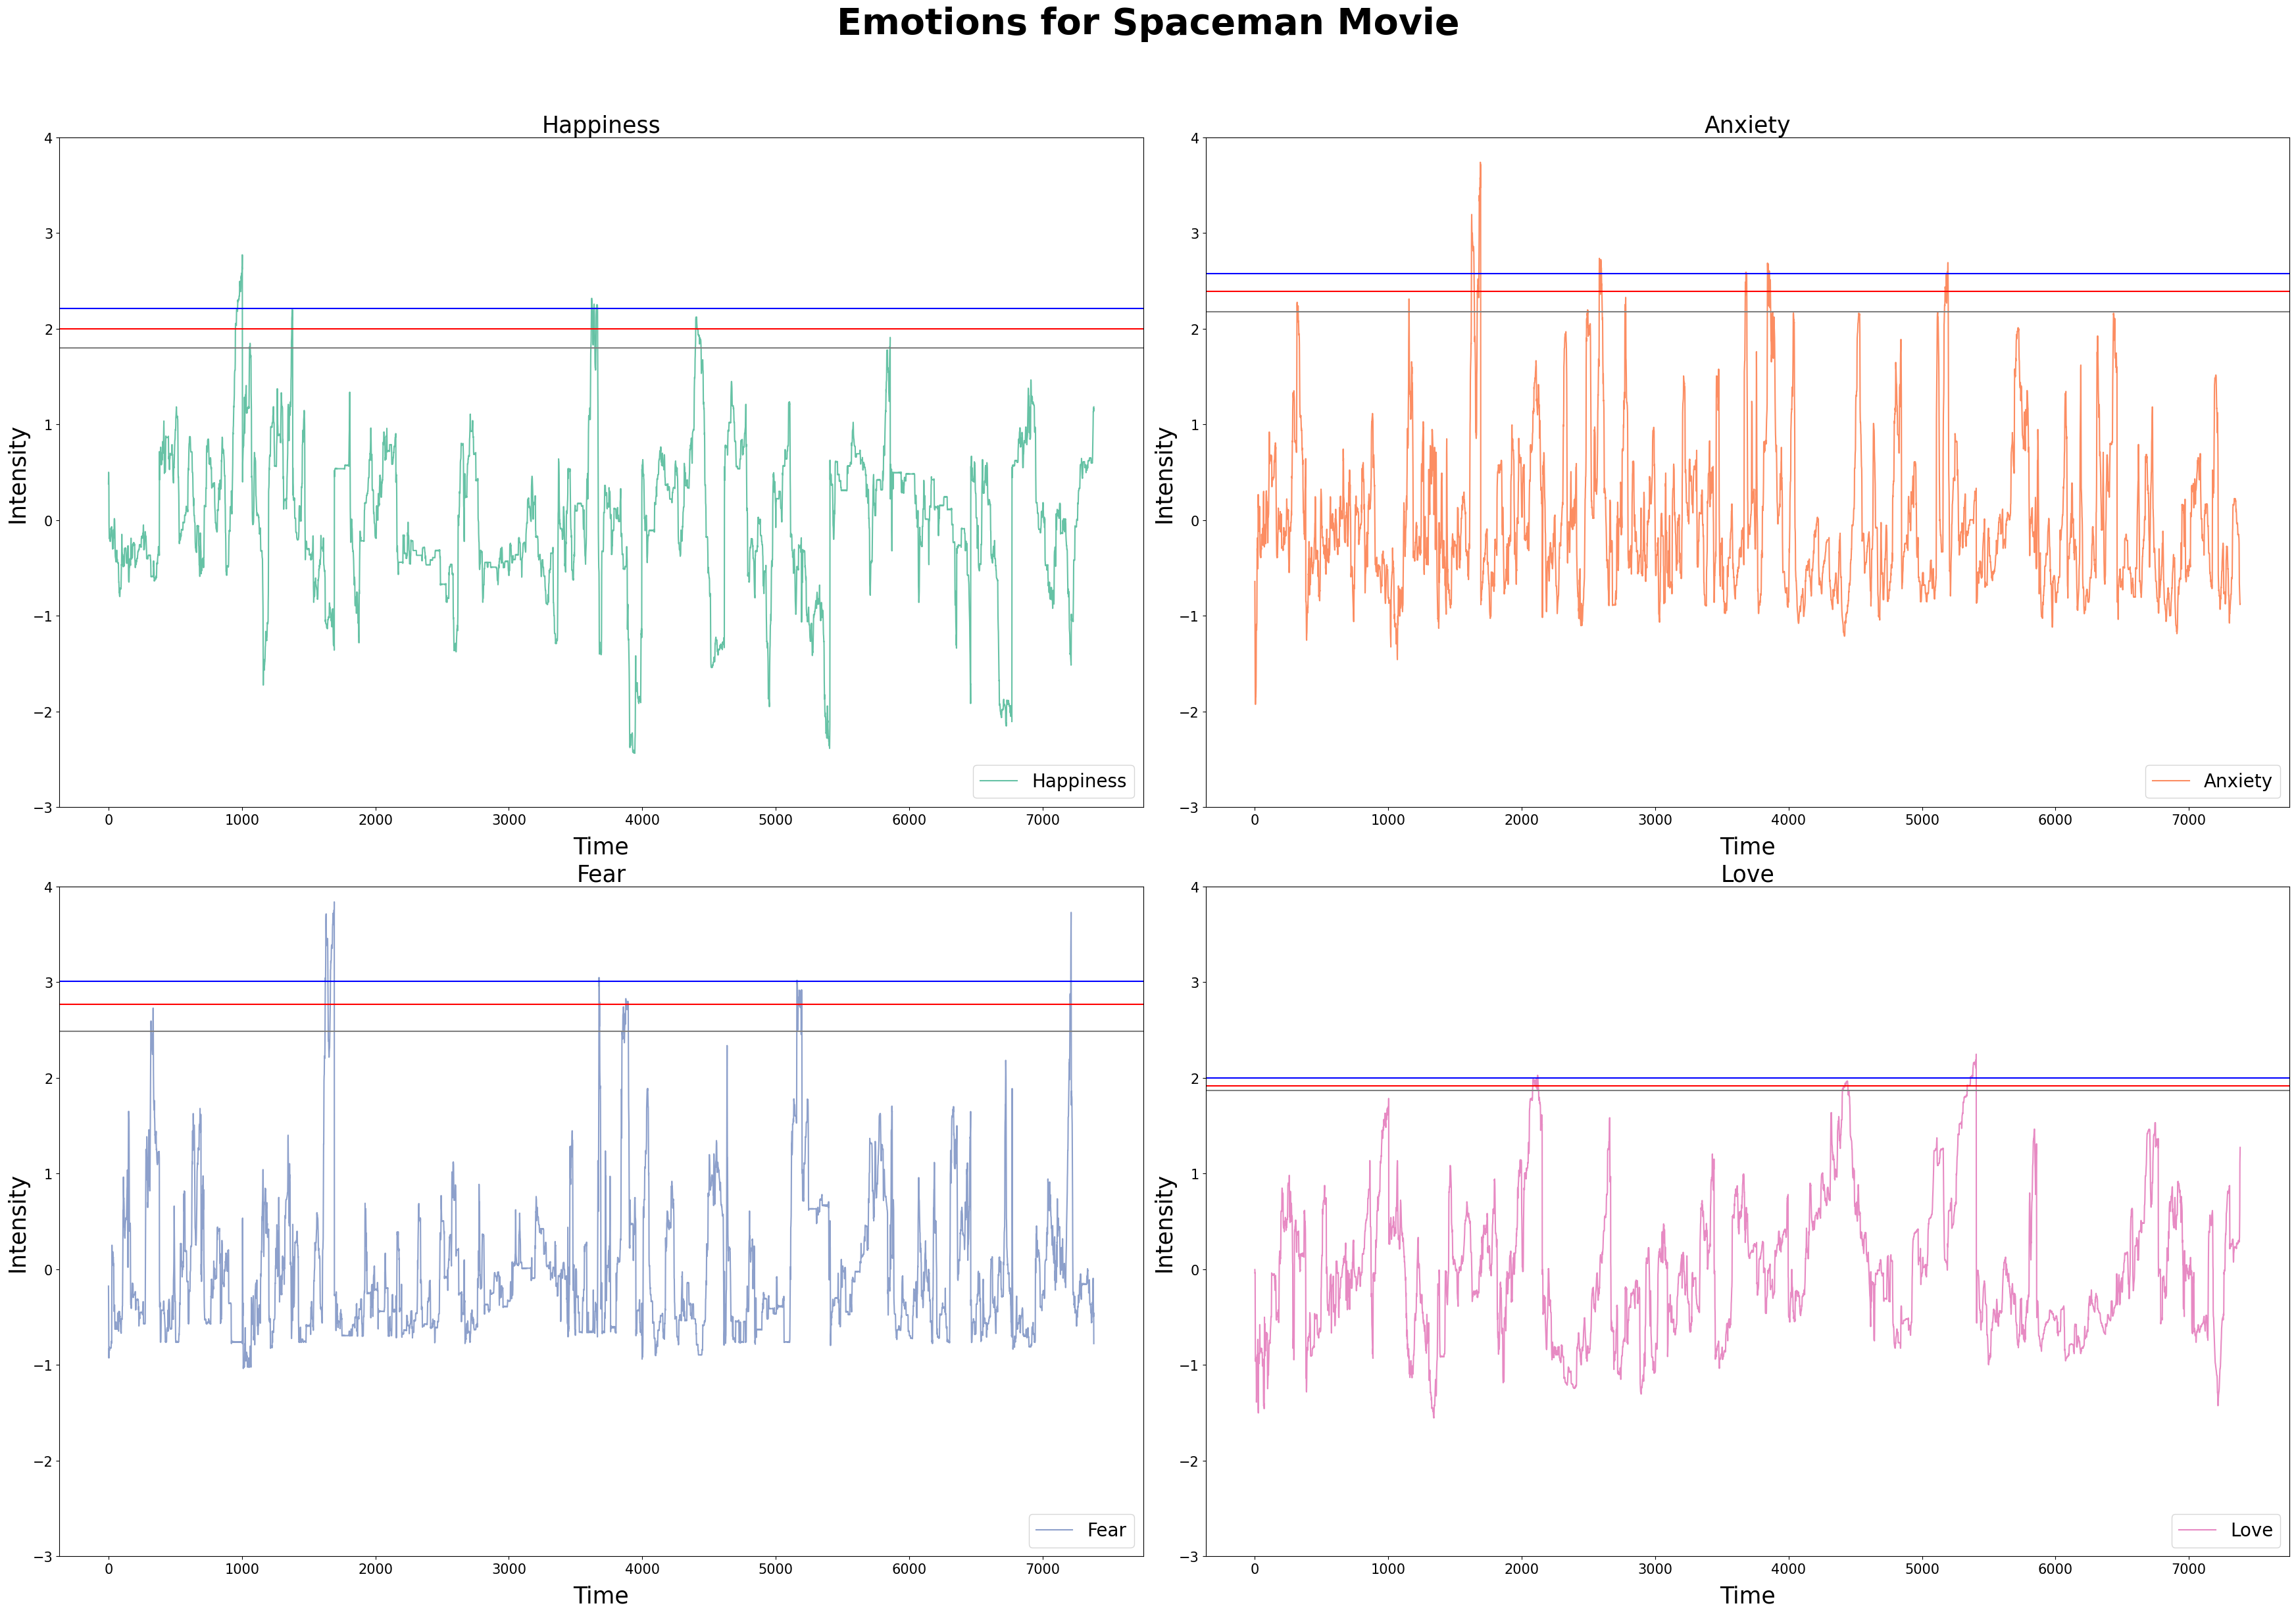

In [5]:
concat_emo_df = concat_emo(server = False)
emotions = ['Happiness', 'Anxiety', 'Fear', 'Love']
palette = sns.color_palette("Set2", len(emotions))

# Determine the layout of the subplot
n_rows = int(len(emotions) ** 0.5)
n_cols = int(len(emotions) / n_rows) + (len(emotions) % n_rows > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, 25))  # Adjust figsize as needed
#fig.suptitle('Emotions for the Concatenated Movies', fontsize=40, fontweight='bold')
fig.suptitle('Emotions for Spaceman Movie', fontsize=40, fontweight='bold')

for i, emotion in enumerate(emotions):
    # Determine the current subplot row and column
    row = i // n_cols
    col = i % n_cols
    if n_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]

    # Plot the data
    ax.plot(concat_emo_df[emotion], label=emotion, color=palette[i])
    ax.set_title(emotion, fontsize=25)
    ax.set_xlabel('Time', fontsize=25, labelpad=10)
    ax.set_ylabel('Intensity', fontsize=25)
    ax.legend(loc='lower right', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_ylim([-3, 4])

    # Plot the thresholds
    thresholds = threshold_from_df(concatmovies = 'concat')
    ax.axhline(y=thresholds[emotion][0], color='grey', linestyle='-', label='150 points')
    ax.axhline(y=thresholds[emotion][1], color='red', linestyle='-', label='100 points')
    if emotion != 'Regard':
        ax.axhline(y=thresholds[emotion][2], color='blue', linestyle='-', label='35 points')
    
    # # Add the movie names
    # for movie in list_movies:
    #     ax.plot(lenght_movies[movie], -3, marker='o', color='red', markersize=10)
    #     if row == 1:
    #         ax.text(lenght_movies[movie], -5.5, movie, ha='center', fontsize=20, rotation=90)

# Adjustments to the layout of the subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)  

plt.show()

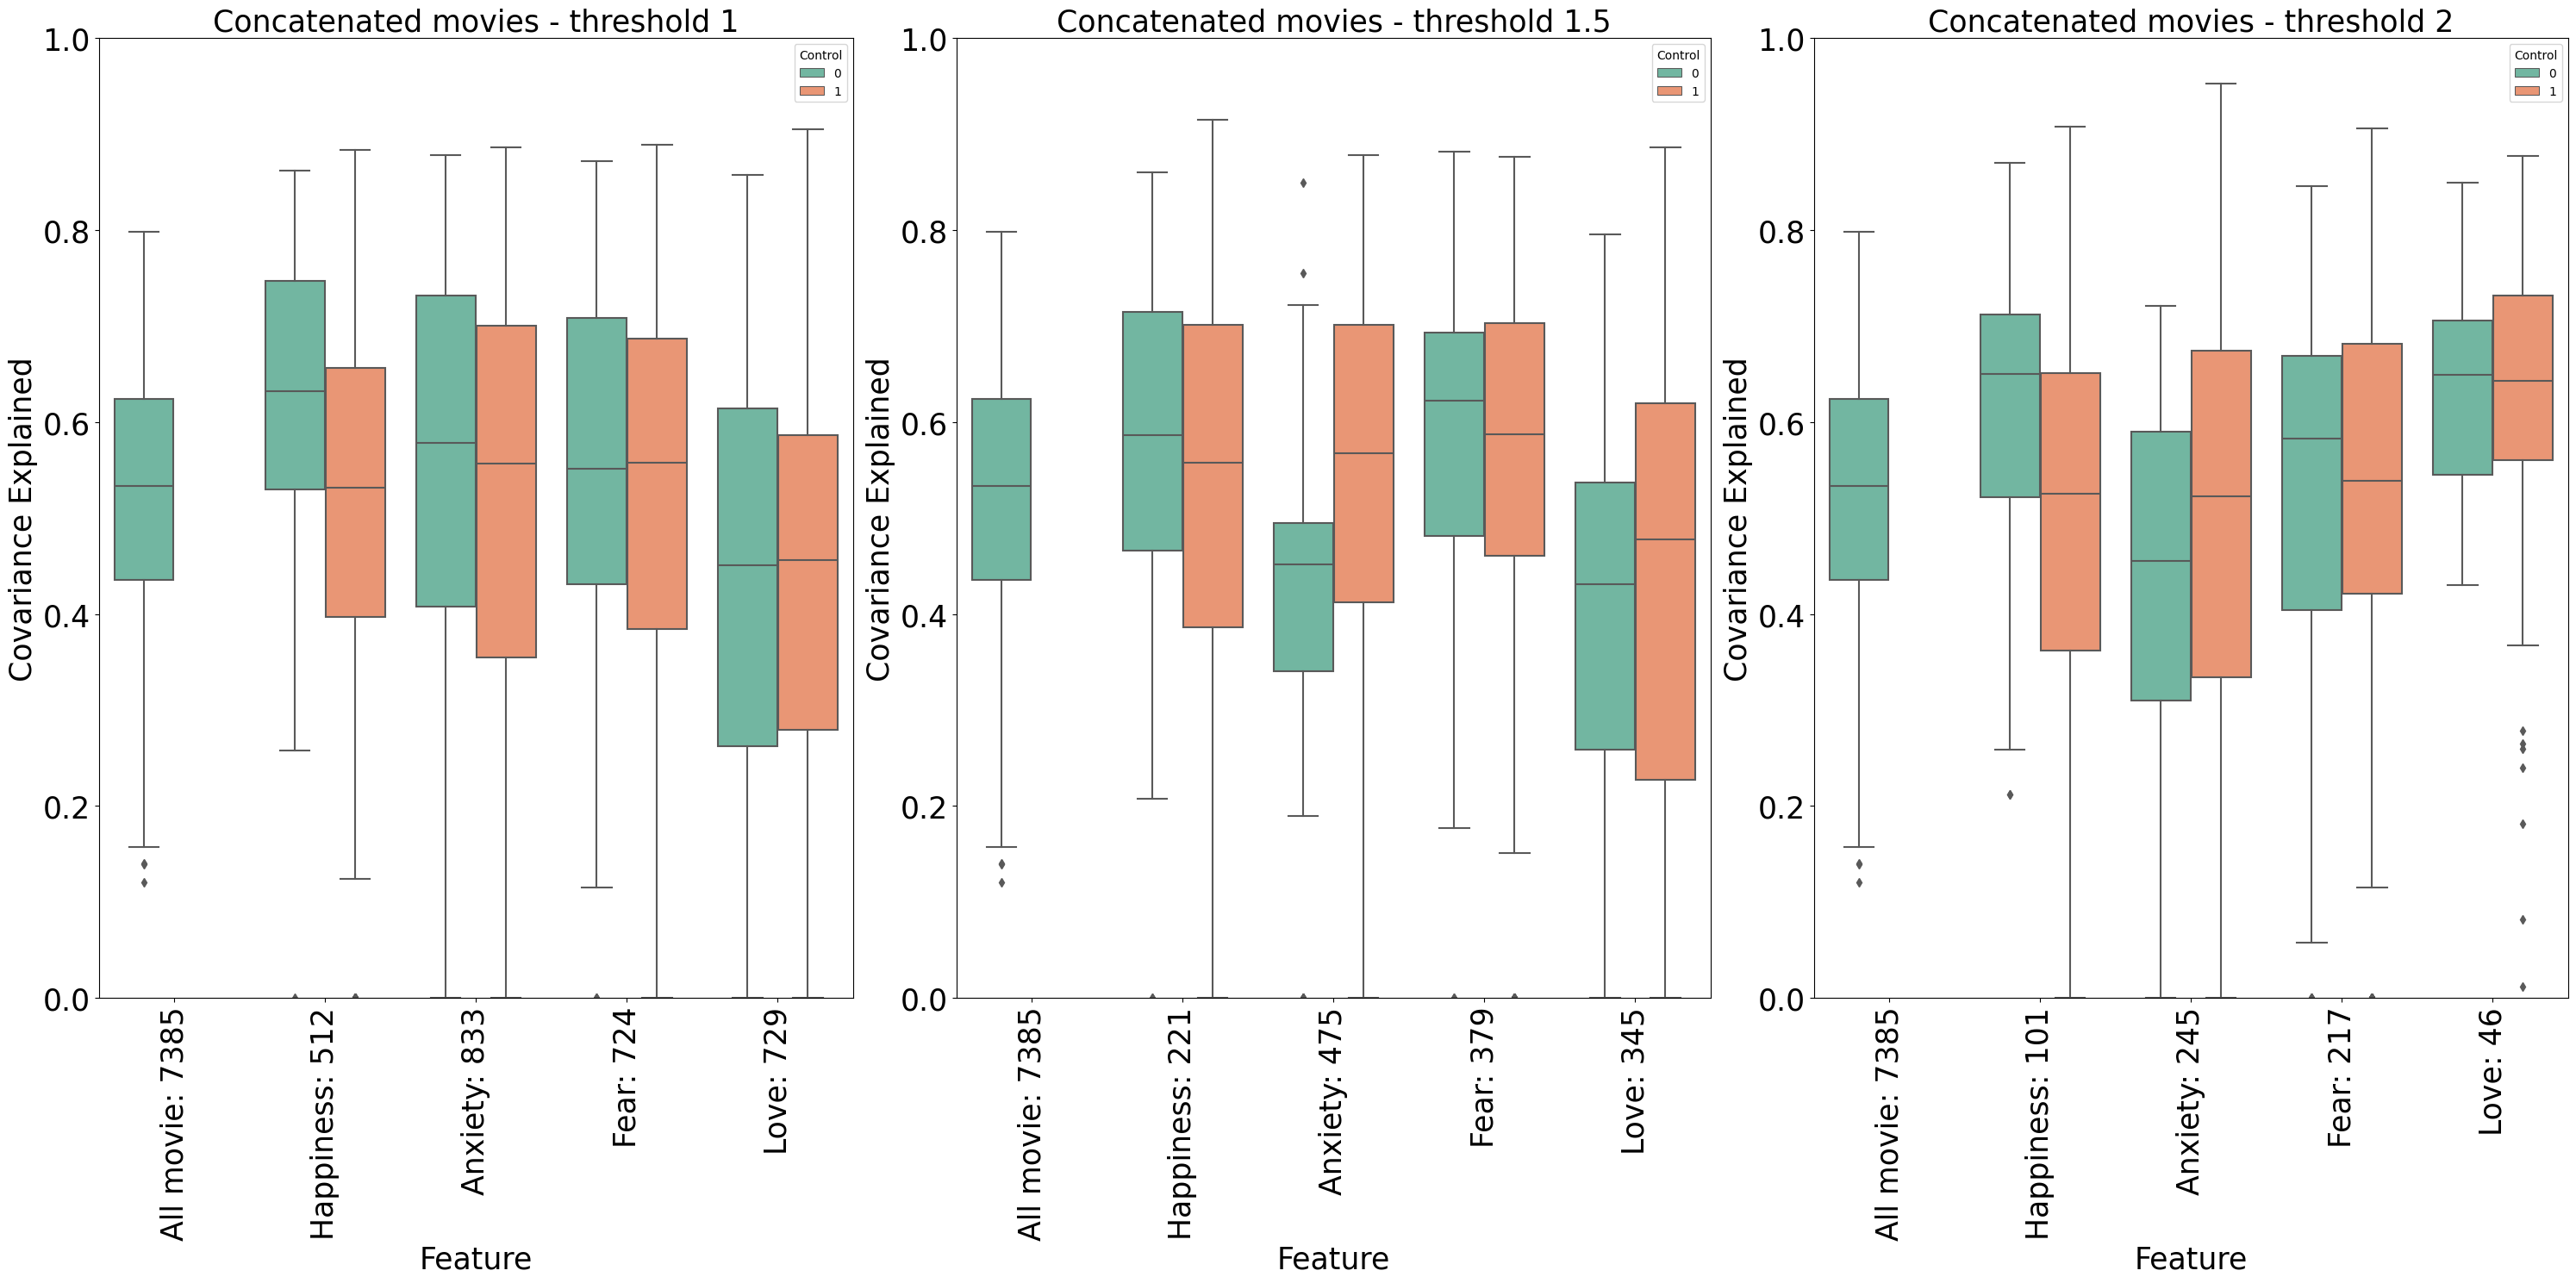

In [6]:
thresholds = [1, 1.5, 2]

significant = retrieve_significant_data(peaks_data, data_all, count_pts, thresholds, emotions)
plot_peaks(significant, thresholds, emotions = emotions, on = 'threshold')

Feature    Number of points
All movie  7385.0              89
Anxiety    245.0               50
           475.0               50
           833.0               50
Fear       217.0               50
           379.0               50
           724.0               50
Happiness  101.0               50
           221.0               50
           512.0               50
Love       46.0                50
           345.0               50
           729.0               50
Name: Covariance Explained, dtype: int64


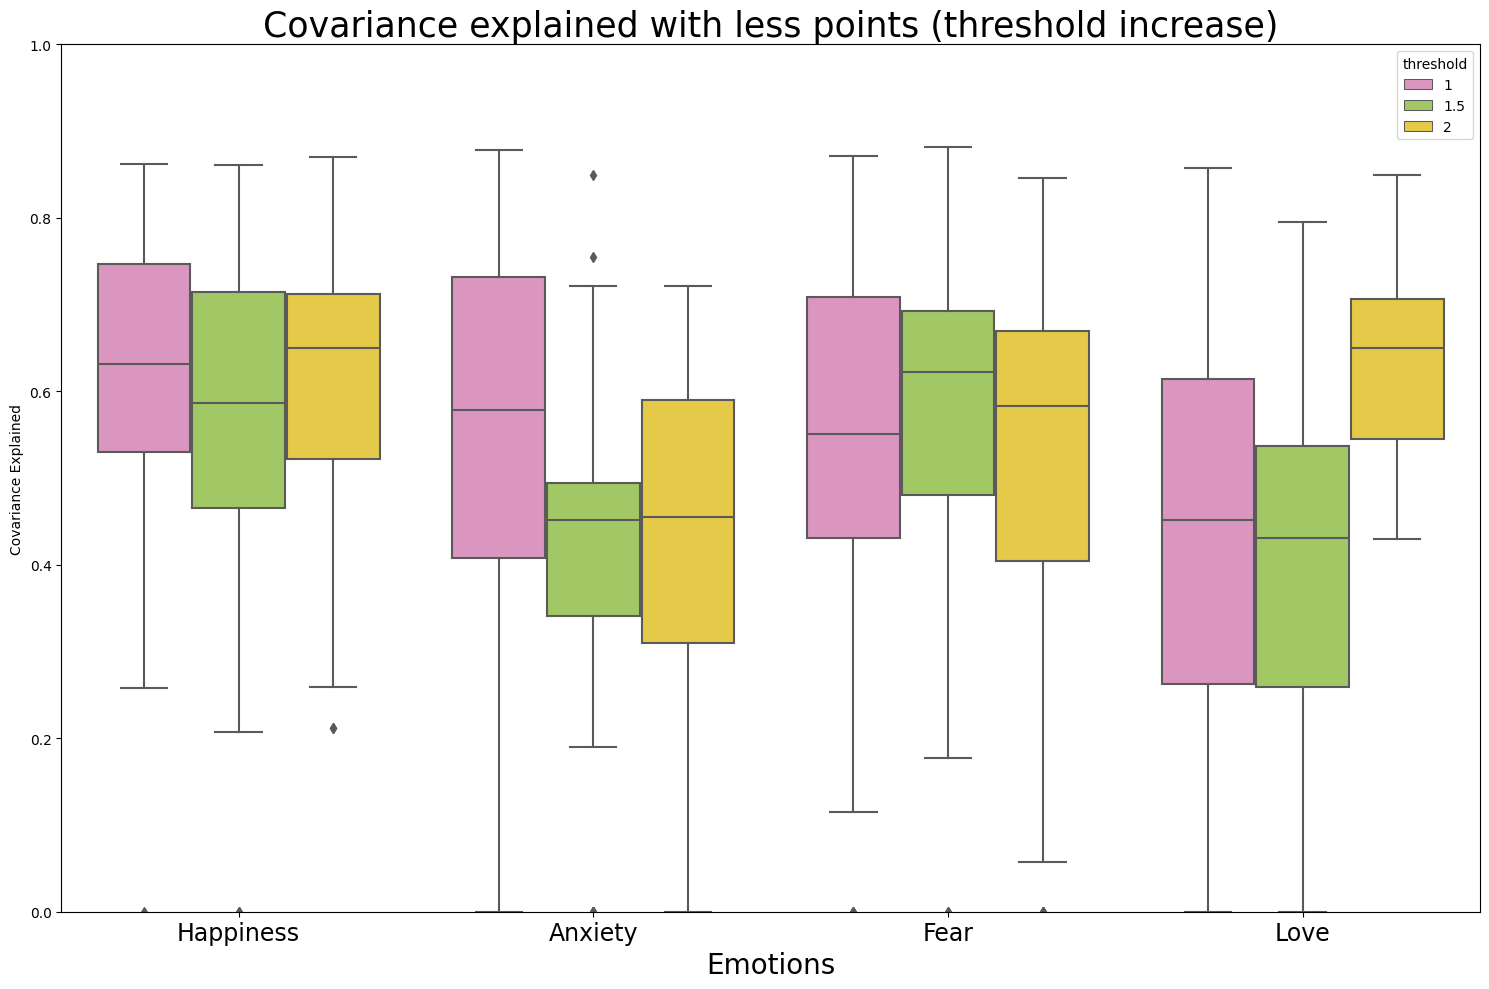

In [7]:
increase_thr(significant, emotions, order_hue = [1, 1.5, 2], on = 'threshold')

## **Mean values**

The shape of the data_concat is:  (7385, 50)
Feature    Number of points
All movie  7385.0              89
negative   46.0                50
           87.0                50
           456.0               50
positive   50.0                50
           119.0               50
           297.0               50
Name: Covariance Explained, dtype: int64


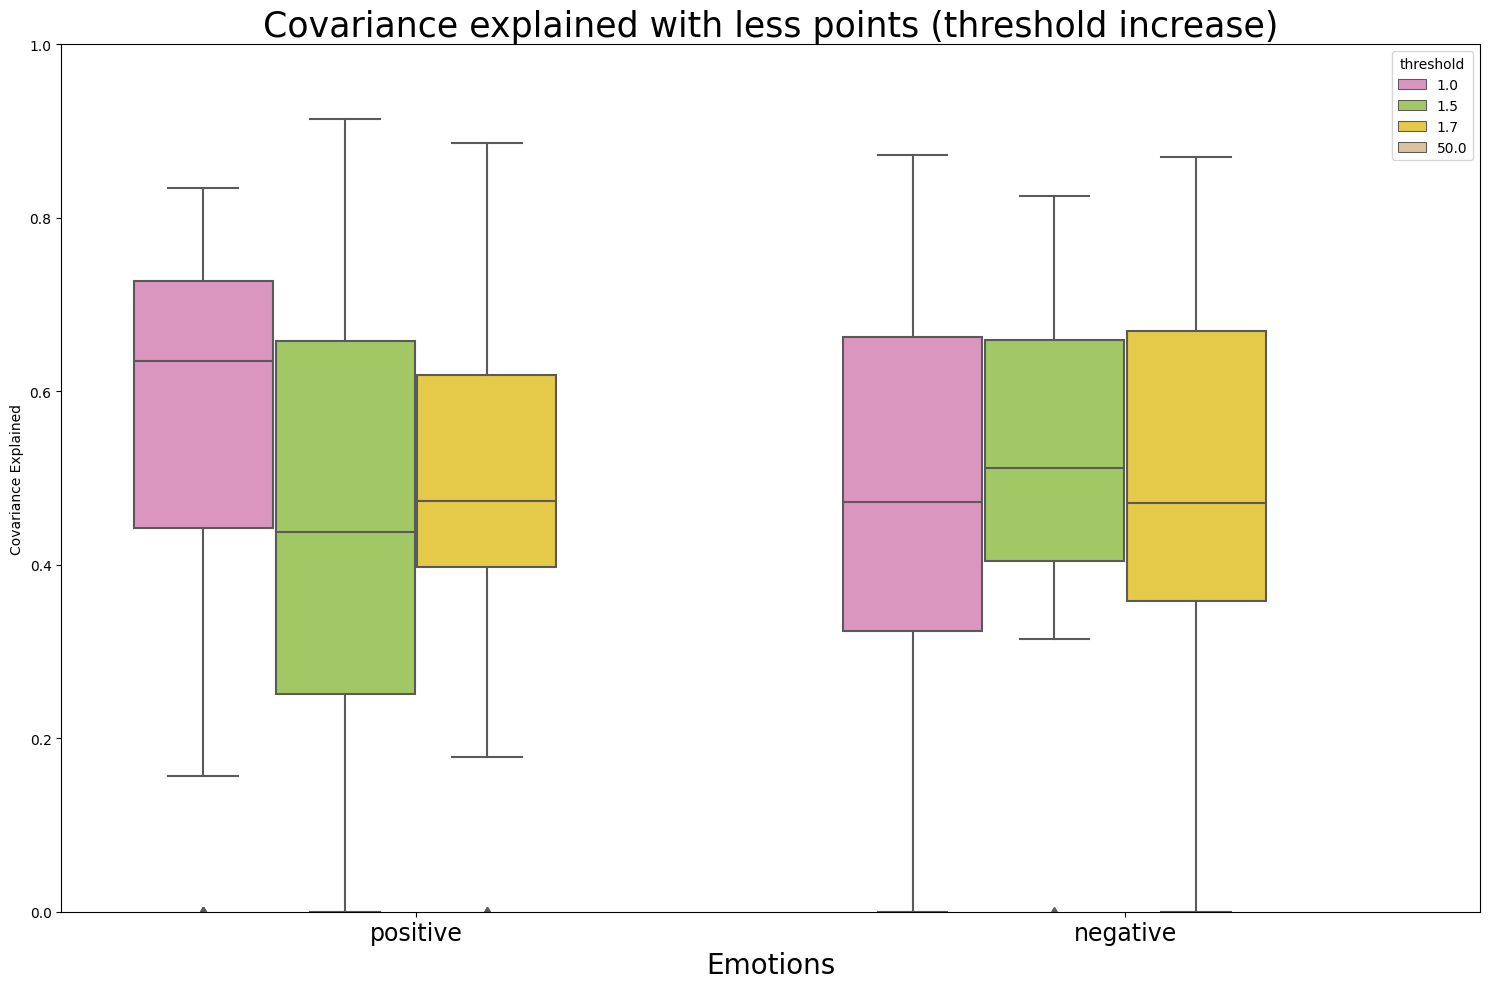

In [8]:
thresholds = [1, 1.5, 1.7]
count_pts, data = counting_points_b(thresholds)

peaks_data = pd.read_csv(PATH_USER_OUTPUT + 'peaks/Mean/PLSmean_concat.csv')
peaks_data.dropna(inplace=True)
peaks_data.loc[(peaks_data['threshold'] != 1.0) & (peaks_data['threshold'] != 1.5), 'threshold'] = 1.7
peaks_data['threshold'] = peaks_data['threshold'].apply(lambda x: round(x, 1))
thresholds = peaks_data[peaks_data['Emotion'] == 'positive'].threshold.unique()

data_all = pd.read_csv(PATH_USER_OUTPUT + 'PLS/Bold/PLS_bold_ALL_concatmovies.csv', index_col=0).reset_index().drop(columns=['Movie', 'LC'])
data_all['Region'] = 'ALL'
data_all['Type'] = 'bold'
data_all['Emotion'] = 'All movie'
data_all.reset_index(inplace=True, drop=False)
data_all.rename(columns={'index': 'bootstrap_round'}, inplace=True)

peaks_data.rename(columns={'Emotion': 'Feature'}, inplace=True)
data_all.rename(columns={'Emotion': 'Feature'}, inplace=True)

significant = retrieve_significant_data(peaks_data, data_all, count_pts, [1, 1.5, 1.7], ['positive', 'negative'])
significant.fillna(50, inplace=True)
# plot_peaks(significant, thresholds, emotions=['positive', 'negative'])
increase_thr(significant, ['positive', 'negative'], on = 'threshold')

# **Peaks from features extracted**

In [9]:
# Read the data of the PLS calculated on the peaks of the emotions  for the concatenated movies
peaks_data = pd.read_csv(PATH_USER_OUTPUT + 'peaks/features_extracted/PLSpeaks_features_extracted_concat.csv')
data_all = pd.read_csv(PATH_USER_OUTPUT + 'PLS/Bold/PLS_bold_ALL_concatmovies.csv', index_col=0).reset_index().drop(columns=['Movie', 'LC'])

peaks_data, data_all, features, thresholds = preprocess_peaks_concat(peaks_data, data_all)

{1.5: {'spectralflux': 564, 'rms': 553, 'zcrs': 516, 'average_brightness': 566, 'average_saturation': 554, 'average_hue': 674, 'All Movie': 7385}, 2: {'spectralflux': 222, 'rms': 336, 'zcrs': 293, 'average_brightness': 226, 'average_saturation': 290, 'average_hue': 271, 'All Movie': 7385}, 2.5: {'spectralflux': 76, 'rms': 241, 'zcrs': 172, 'average_brightness': 87, 'average_saturation': 159, 'average_hue': 69, 'All Movie': 7385}}


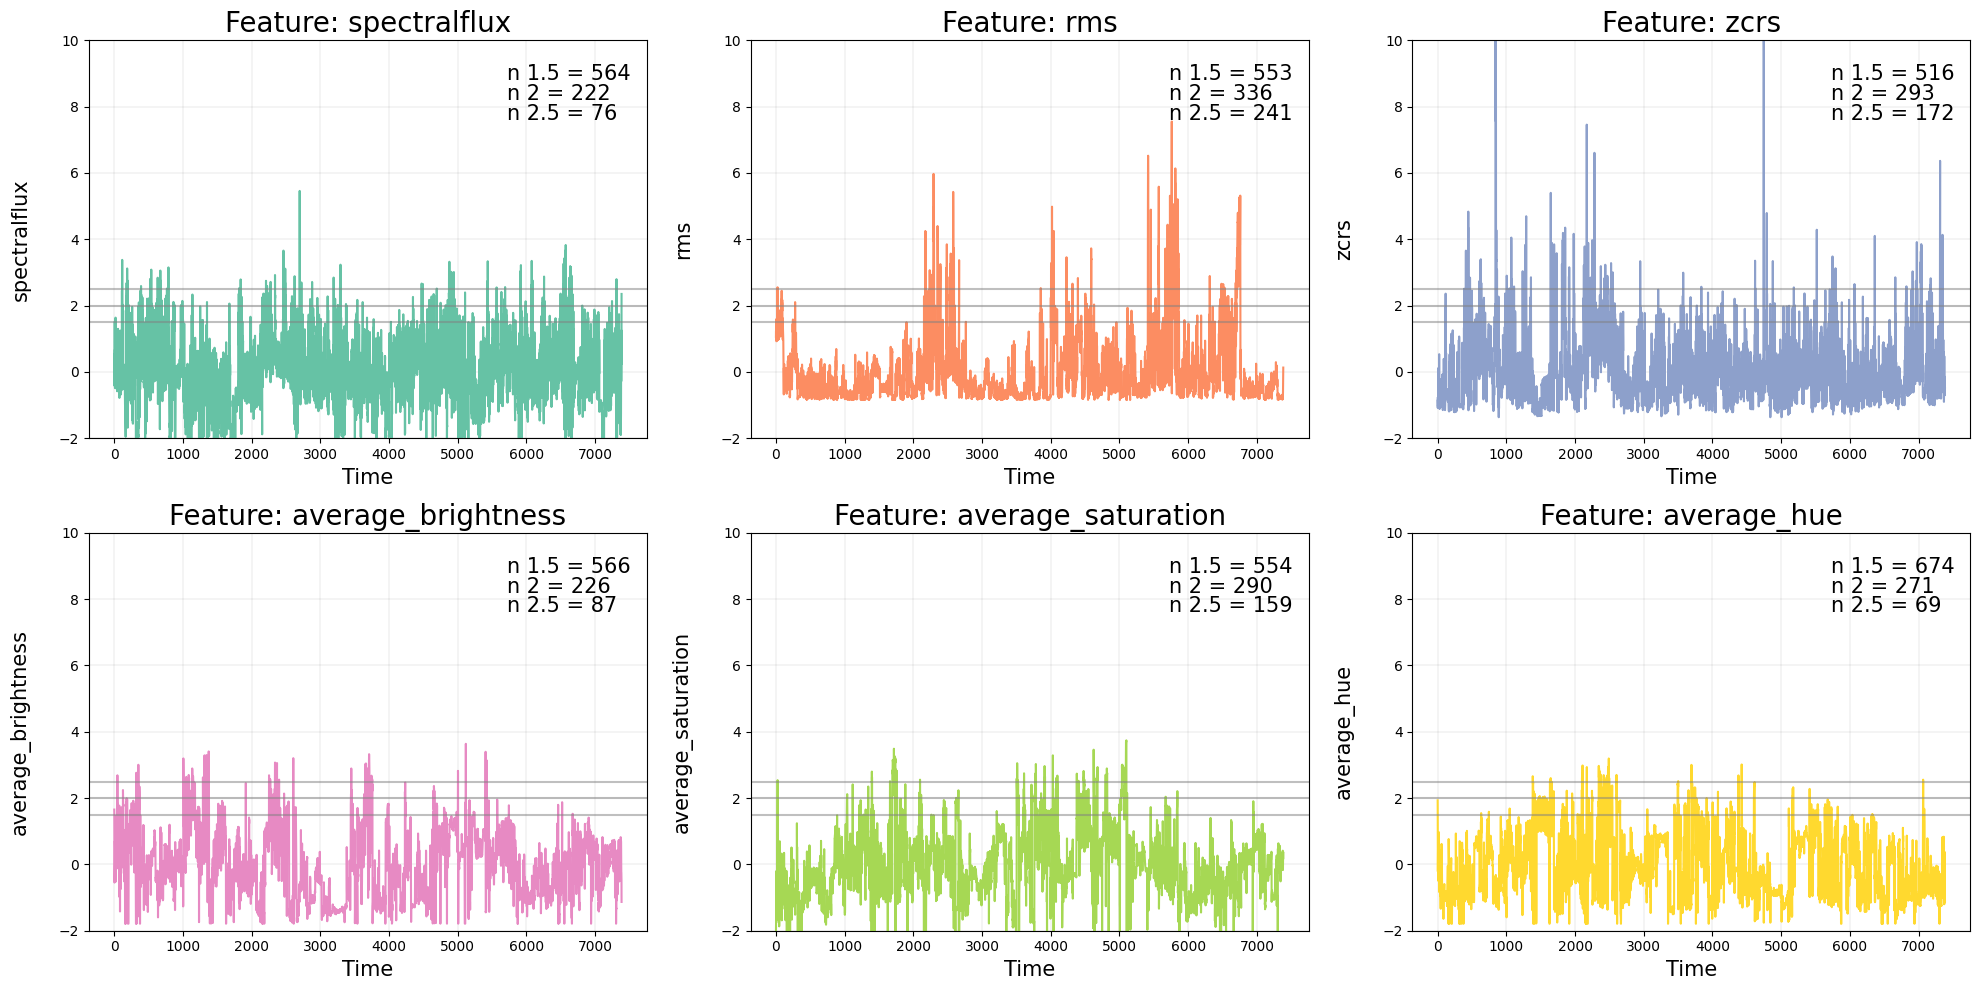

In [10]:
concatenated_features = extract_features_concat(cluster = False)

features = concatenated_features.columns
count_pts = count_features_above_threshold(concatenated_features, [1.5, 2, 2.5], features)
print(count_pts)

# plot the features
def plot_features(features, thresholds):
    num_features = features.shape[1]
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Adjusted for 2x3 grid
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Predefined colors
    colors = sns.color_palette("Set2", num_features)
    
    for i, feature in enumerate(features.columns):
        ax = axes[i]
        ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        ax.set_title(f'Feature: {feature}', fontsize=20)
        ax.set_xlabel('Time', fontsize=15)
        ax.set_ylabel(feature, rotation=90, labelpad=20, fontsize=15)
        ax.plot(features[feature], color=colors[i])  # Use different color for each line
        ax.set_ylim([-2, 10])

        # Add the threshold lines
        for thr in thresholds:
            ax.axhline(y=thr, color='grey', linestyle='-', alpha=0.5)

        # add a text with the number of points above the threshold
        ax.annotate(f'n {1.5} = {count_pts[1.5][feature]}', xy=(0.75, 0.90), xycoords='axes fraction', fontsize = 15)
        ax.annotate(f'n {2} = {count_pts[2][feature]}', xy=(0.75, 0.85), xycoords='axes fraction', fontsize = 15)
        ax.annotate(f'n {2.5} = {count_pts[2.5][feature]}', xy=(0.75, 0.80), xycoords='axes fraction', fontsize = 15)

    plt.tight_layout()
    plt.show()

plot_features(concatenated_features, [1.5, 2, 2.5])

average_brightness 566
average_brightness 226
average_brightness 87
average_saturation 554
average_saturation 290
average_saturation 159
average_hue 674
average_hue 271
average_hue 69
Feature             Number of points
All movie           7385.0              89
average_brightness  87.0                50
                    226.0               50
                    566.0               50
average_hue         69.0                50
                    271.0               50
                    674.0               50
average_saturation  159.0               50
                    290.0               50
                    554.0               50
spectralflux        76.0                50
                    222.0               50
                    564.0               50
Name: Covariance Explained, dtype: int64


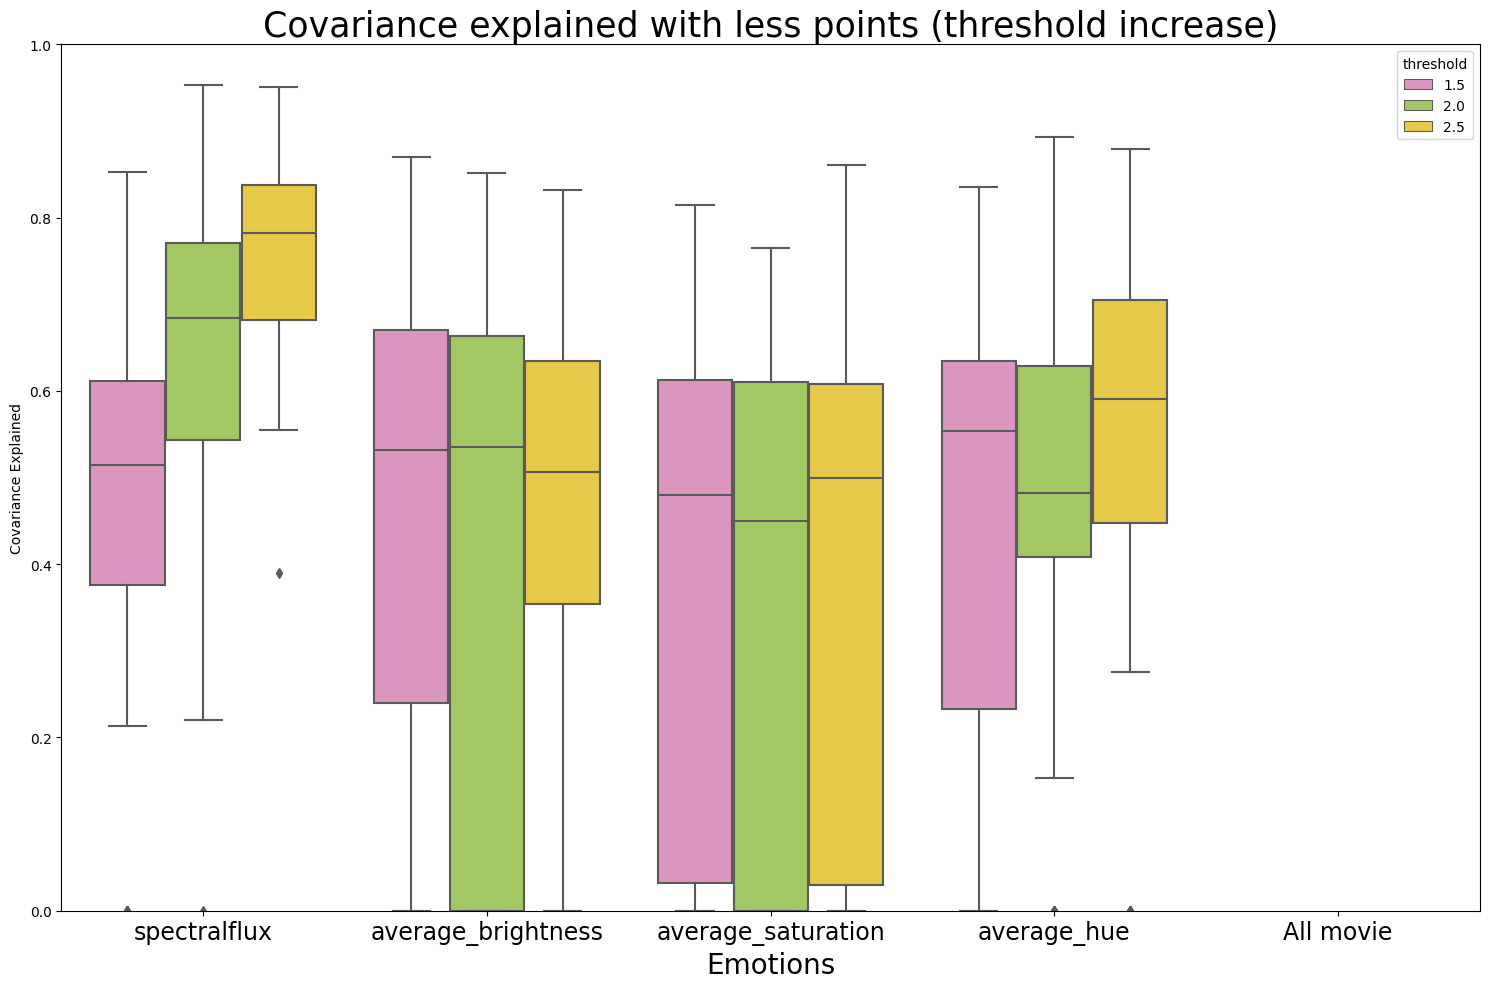

In [11]:
thresholds = [1.5, 2, 2.5]

significant = retrieve_significant_data(peaks_data, data_all, count_pts, thresholds, features)
features = ['spectralflux', 'average_brightness','average_saturation', 'average_hue', 'All movie']
increase_thr(significant, features, on='threshold')

# **Peaks from concat movie points**

In [12]:
# Create the peaks data
peaks_data = pd.read_csv(PATH_USER_OUTPUT + 'peaks/concatenated_bold/PLSpeaks_emotions_concat_bold_ALL_pts.csv', delimiter=';')
peaks_data['Method'] = 'bold'
peaks_data = peaks_data.groupby(['Region', 'bootstrap_round', 'Feature', 'Number of points', 'LC', 'Method', 'Movie']).last().reset_index()

# Create the entire movie
data_all = pd.read_csv(PATH_USER_OUTPUT + 'PLS/Bold/PLS_bold_ALL_concatmovies.csv', index_col=0).reset_index().drop(columns=['Movie', 'LC'])
data_all.reset_index(inplace=True, drop=False)
data_all['bootstrap_round'] = data_all.index // 12
data_all['threshold'] = 1
data_all['Method'] = 'bold'
data_all['Region'] = 'ALL'
data_all['Feature'] = 'All movie'
data_all['Movie'] = 'concatenated'
data_all['bootstrap_round'] = np.arange(0, 89)

The shape of the significant_peaks is:  (1800, 6)
The shape of the significant_all_movie is:  (100, 6)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Love_50 vs. Love_100: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.725e-06 Stat=1.134e+03
Sad_50 vs. Sad_100: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.351e-04 Stat=1.482e+03
Happiness_50 vs. Happiness_100: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.302e-01 Stat=2.385e+03
Anxiety_50 vs. Anxiety_100: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.804e-10 Stat=7.040e+02
Fear_50 vs. Fear_100: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.534e-02 Stat=1.913e+03
WarmHeartedness_50 vs. WarmHeartedness_100: Wilcoxon test (paired samples) with Benjamini-Hochberg cor

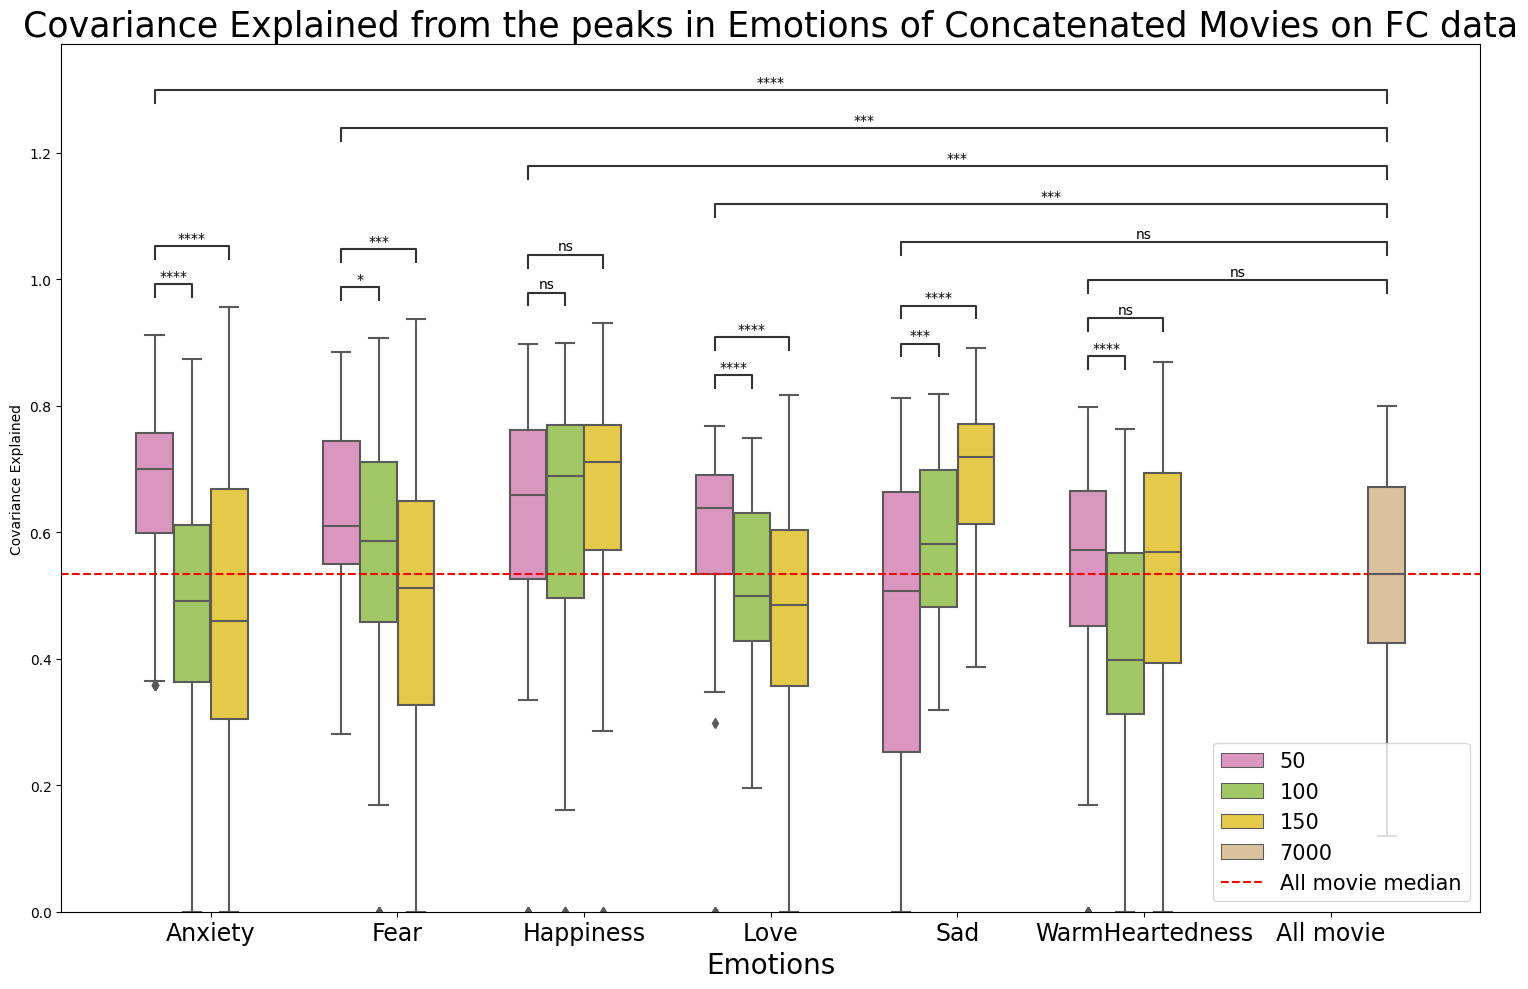

In [13]:
n_points = [50, 100, 150]
features = ['Anxiety', 'Fear', 'Happiness', 'Love', 'Sad', 'WarmHeartedness', 'All movie']

pairs = [
        (('Anxiety', 100), ('Anxiety', 50)), (('Anxiety', 50), ('Anxiety', 150)),
        (('Fear', 100), ('Fear', 50)), (('Fear', 50), ('Fear', 150)), 
        (('Happiness', 100), ('Happiness', 50)), (('Happiness', 50), ('Happiness', 150)), 
        (('Love', 100), ('Love', 50)), (('Love', 50), ('Love', 150)), 
        (('Sad', 100), ('Sad', 50)), (('Sad', 50), ('Sad', 150)),
        (('WarmHeartedness', 100), ('WarmHeartedness', 50)), (('WarmHeartedness', 50), ('WarmHeartedness', 150)),
        (('Anxiety', 50), ('All movie', 7000)), 
        (('Fear', 50), ('All movie', 7000)),
        (('Happiness', 50), ('All movie', 7000)),
        (('Love', 50), ('All movie', 7000)),
        (('Sad', 50), ('All movie', 7000)),
        (('WarmHeartedness', 50), ('All movie', 7000))
        ]

significant = retrieve_significant(peaks_data, data_all, number_lines=100)
#plot_peaks(significant, [150, 100, 50], on = 'Number of points')

stats_df = pd.DataFrame(columns=['Method', 'Region', 'Annotations', 'Comparisons', 'Movie'])
stats_df = annotations_plot(significant, order_emotions = ['Anxiety', 'Fear', 'Happiness', 'Love', 'Sad', 'WarmHeartedness', 'All movie'], pairs = pairs, 
             title = 'Covariance Explained from the peaks in Emotions of Concatenated Movies on FC data', on = 'Number of points',
             stats_df = stats_df,
             region = 'ALL', method = 'Bold', movie = 'concatenated')

# **Single movie: emotions**

With this code we plot the annotated graphs for the single movie on whole brain for: FC, Scaffolds and Triangles.

The shape of the significant_peaks is:  (450, 6)
The shape of the significant_all_movie is:  (30, 6)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.534e-01 Stat=1.760e+02
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:9.720e-02 Stat=1.200e+02
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.579e-01 Stat=1.630e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:5.769e-02 Stat=1.400e+02
WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.766e-03 Stat=9.100e+01
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.120

/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Anxiety_35 vs. Anxiety_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.744e-03 Stat=9.500e+01
Love_35 vs. Love_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.886e-04 Stat=6.100e+01
WarmHeartedness_35 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.643e-02 Stat=1.170e+02
Sad_35 vs. All movie_7000: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.408e-01 Stat=2.090e+02
Fear_35 vs. All movie_7000: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.004e-01 Stat=1.800e+02
WarmHeartedness_35 vs. All movie_7000: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.642e-01 Stat=1.640e+02
Love_35 vs. All movie_7000: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.188e-03 Stat=8.800e+01
Anxiety_35 vs. All movie_7000: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_v

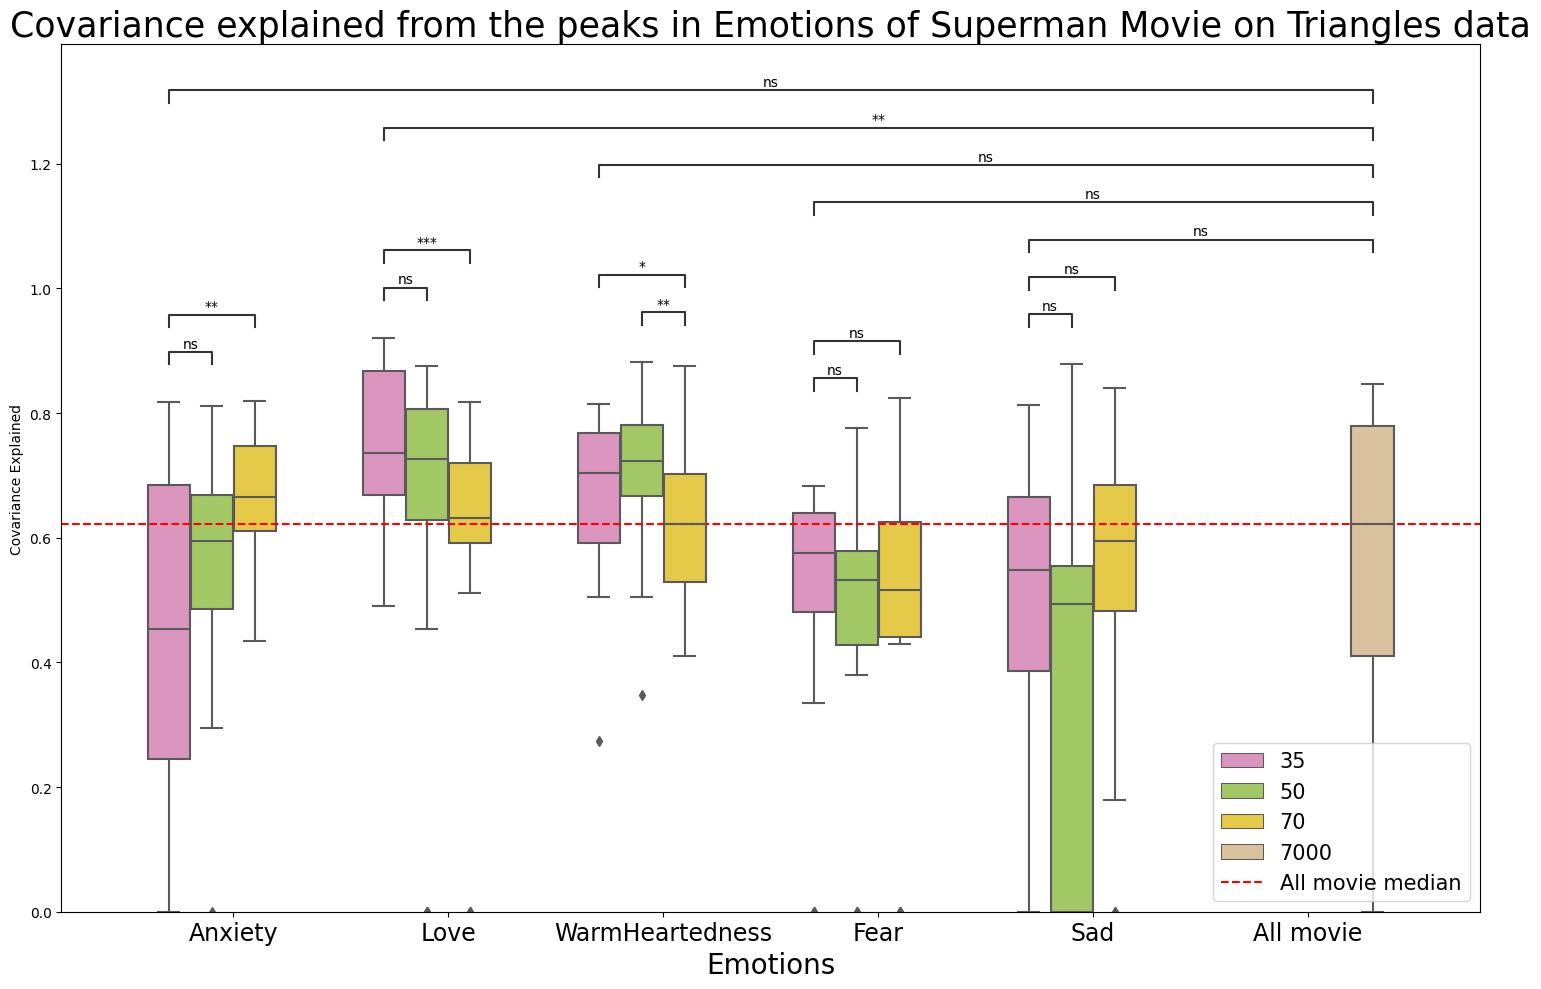

In [14]:
method = 'triangles' # between 'scaffold' and 'triangles'
MOVIE = 'Spaceman'
region = 'ALL'

stats_df = pd.DataFrame(columns=['Method', 'Region', 'Annotations', 'Comparisons', 'Movie'])

pairs = [
        (('Anxiety', 70), ('Anxiety', 35)), (('Anxiety', 50), ('Anxiety', 35)),
        (('Fear', 70), ('Fear', 35)), (('Fear', 50), ('Fear', 35)),
        (('Love', 70), ('Love', 35)), (('Love', 50), ('Love', 35)),
        (('Sad', 70), ('Sad', 35)), (('Sad', 50), ('Sad', 35)),
        (('WarmHeartedness', 70), ('WarmHeartedness', 50)), (('WarmHeartedness', 70), ('WarmHeartedness', 35)),
        (('Happiness', 70), ('Happiness', 35)), (('Happiness', 50), ('Happiness', 35)),
        (('Anxiety', 35), ('All movie', 7000)), 
        (('Fear', 35), ('All movie', 7000)),
        (('Happiness', 35), ('All movie', 7000)),
        (('Love', 35), ('All movie', 7000)),
        (('Sad', 35), ('All movie', 7000)),
        (('WarmHeartedness', 35), ('All movie', 7000))
        ]

if method == 'triangles':
    pairs = [pair for pair in pairs if pair not in [(('Happiness', 35), ('All movie', 7000)), (('Happiness', 70), ('Happiness', 35)), (('Happiness', 50), ('Happiness', 35))]]

# Create the peaks data
peaks_data = pd.read_csv(PATH_USER_OUTPUT + f'peaks/{method.capitalize()}/PLSpeaks_emotions_single_{method}_ALL_pts.csv')
peaks_data = peaks_data[~peaks_data['Number of points'].isin([100, 150])]
peaks_data = peaks_data.groupby(['Region', 'bootstrap_round', 'Feature', 'Number of points', 'threshold', 'LC', 'Method', 'Movie']).last().reset_index()
peaks_data = peaks_data[(peaks_data['Movie'] == MOVIE) & (peaks_data['Region'] == region) & (peaks_data['Method'] == method)]

# Create the all movie data
data_all = pd.read_csv(PATH_USER_OUTPUT + f'PLS/{method.capitalize()}/PLS_{method}_ALL_bootstrap_results.csv', index_col=0).reset_index()
data_all = data_all[data_all['Movie'] == MOVIE]
data_all['Region'] = 'ALL'
data_all['Type'] = method
data_all.reset_index(inplace=True, drop=False)
data_all['bootstrap_round'] = data_all.index // 12

# Plots
significant = retrieve_significant(peaks_data, data_all, number_lines=30)
#plot_peaks_pts(significant, [70, 50, 35])
stats_df = annotations_plot(significant, [70, 50 ,35], on = 'Number of points', pairs=pairs, title = f'Covariance explained from the peaks in Emotions of Superman Movie on {method.capitalize()} data', 
             stats_df = stats_df, region = region, method = method.capitalize(), movie = MOVIE)

# **Peaks on Functional Networks**

DA
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:4.280e-01 Stat=1.930e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.707e-01 Stat=1.880e+02
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.129e-01 Stat=1.710e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.009e-01 Stat=1.310e+02
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.718e-04 Stat=7.700e+01
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.356e-02 Stat=1.420e+02
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benjamini-Hoch

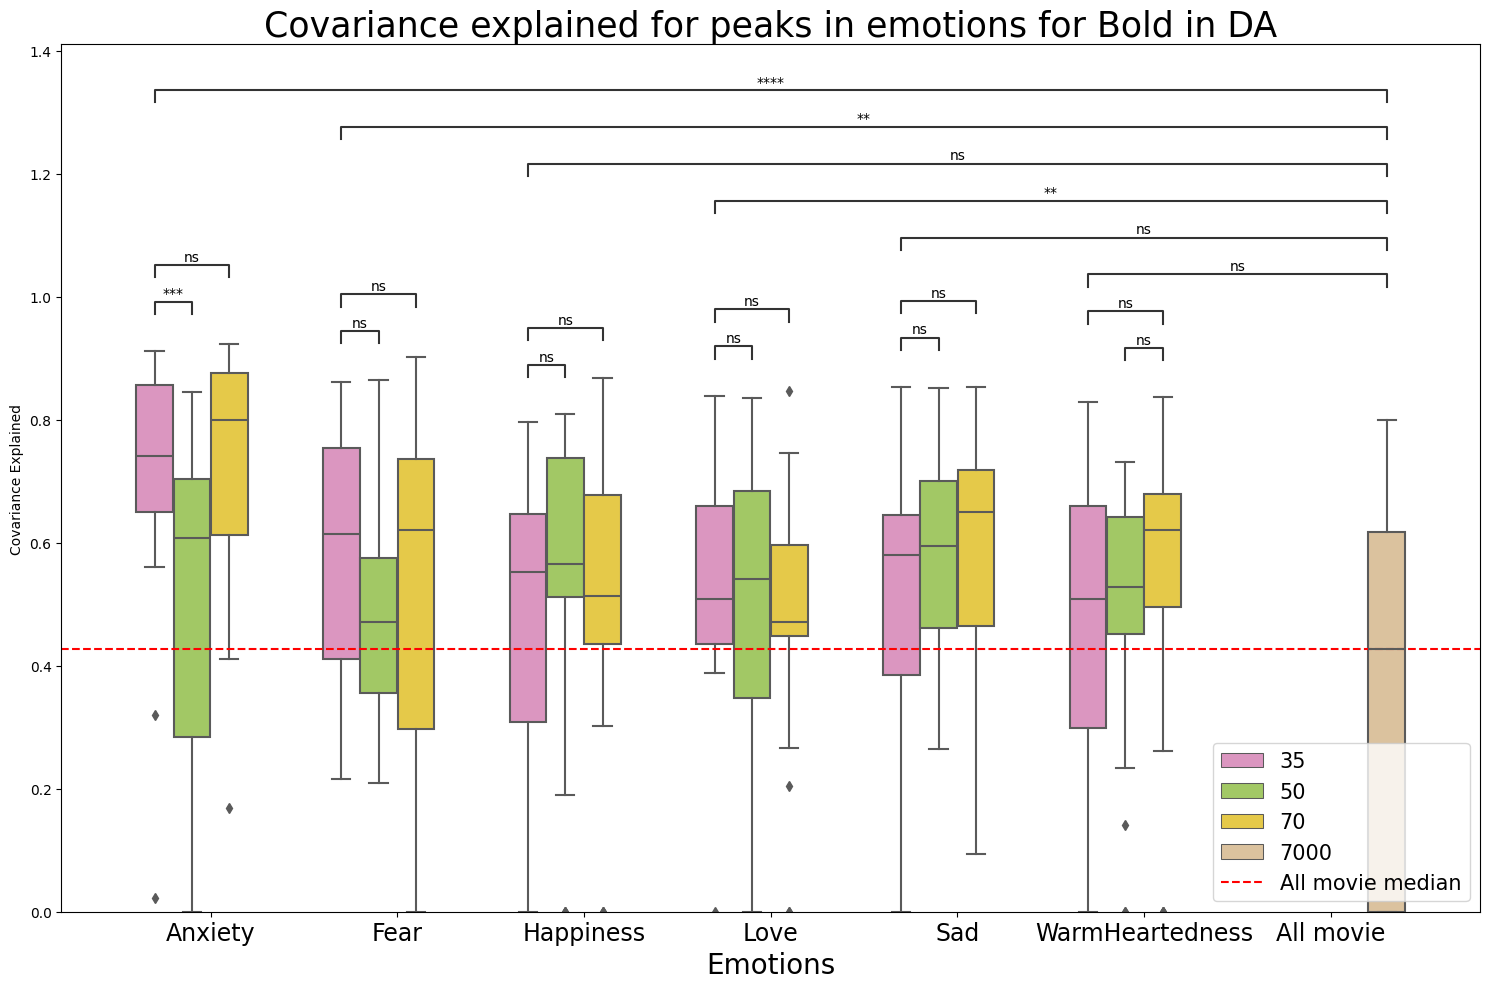

FP
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.341e-03 Stat=8.200e+01
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.419e-02 Stat=1.120e+02
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:9.032e-01 Stat=2.260e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.560e-03 Stat=9.000e+01
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.128e-04 Stat=6.600e+01
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.666e-04 Stat=7.400e+01
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benjamini-Hoch

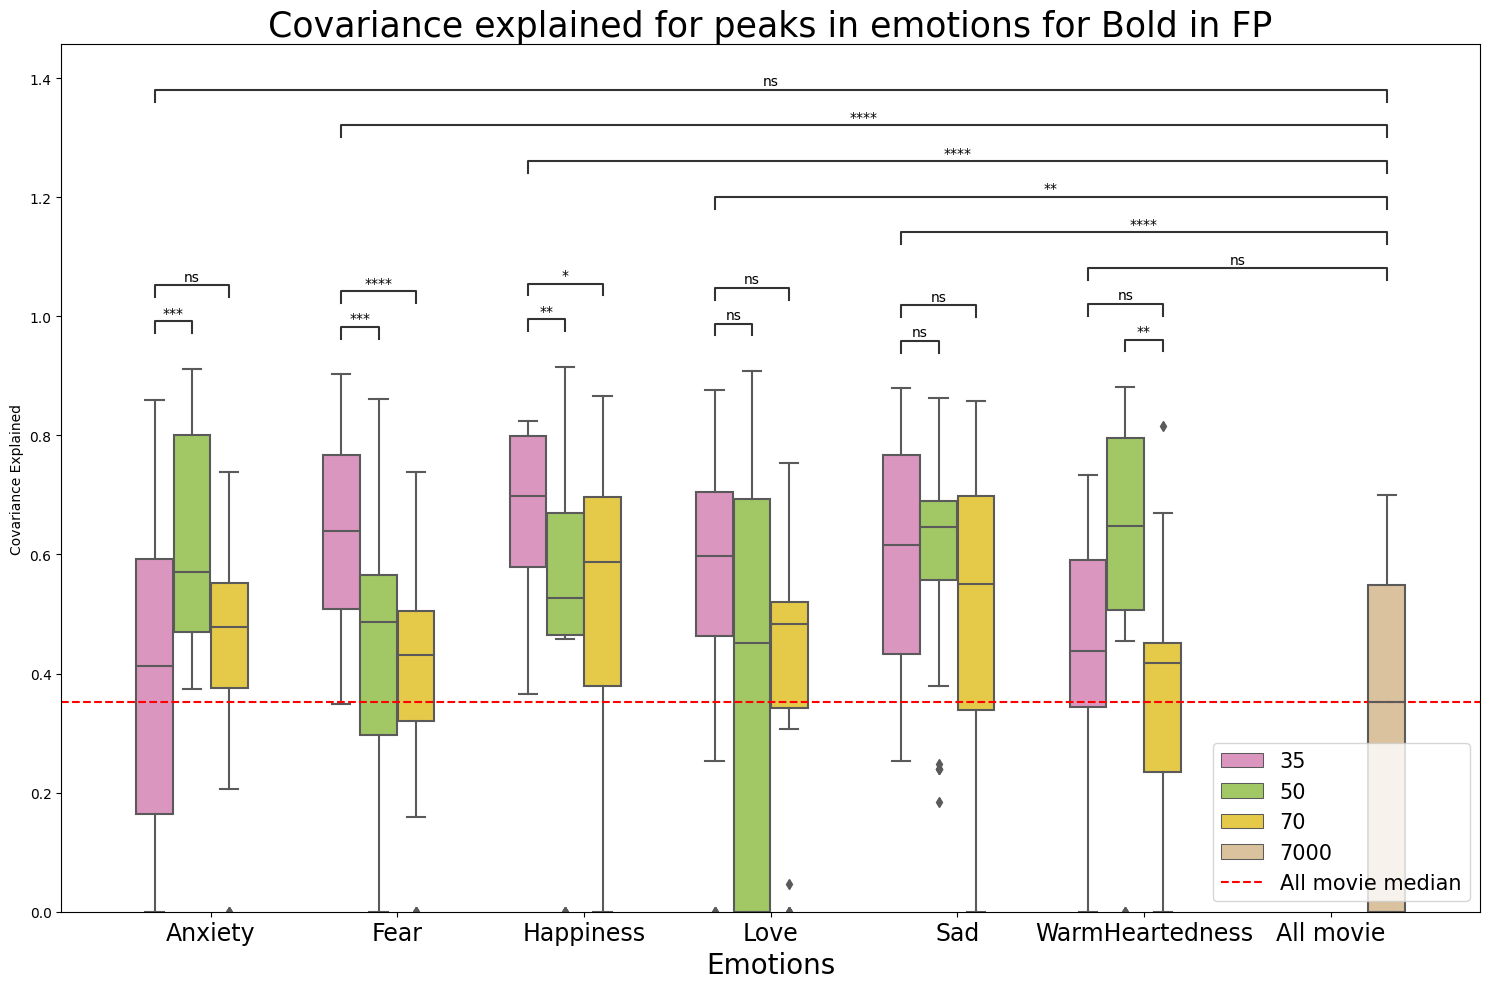

SM
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.303e-01 Stat=2.150e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.706e-01 Stat=1.650e+02
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:9.195e-02 Stat=1.500e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.794e-02 Stat=1.490e+02
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.131e-03 Stat=8.000e+01
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.945e-02 Stat=1.390e+02
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benjamini-Hoch

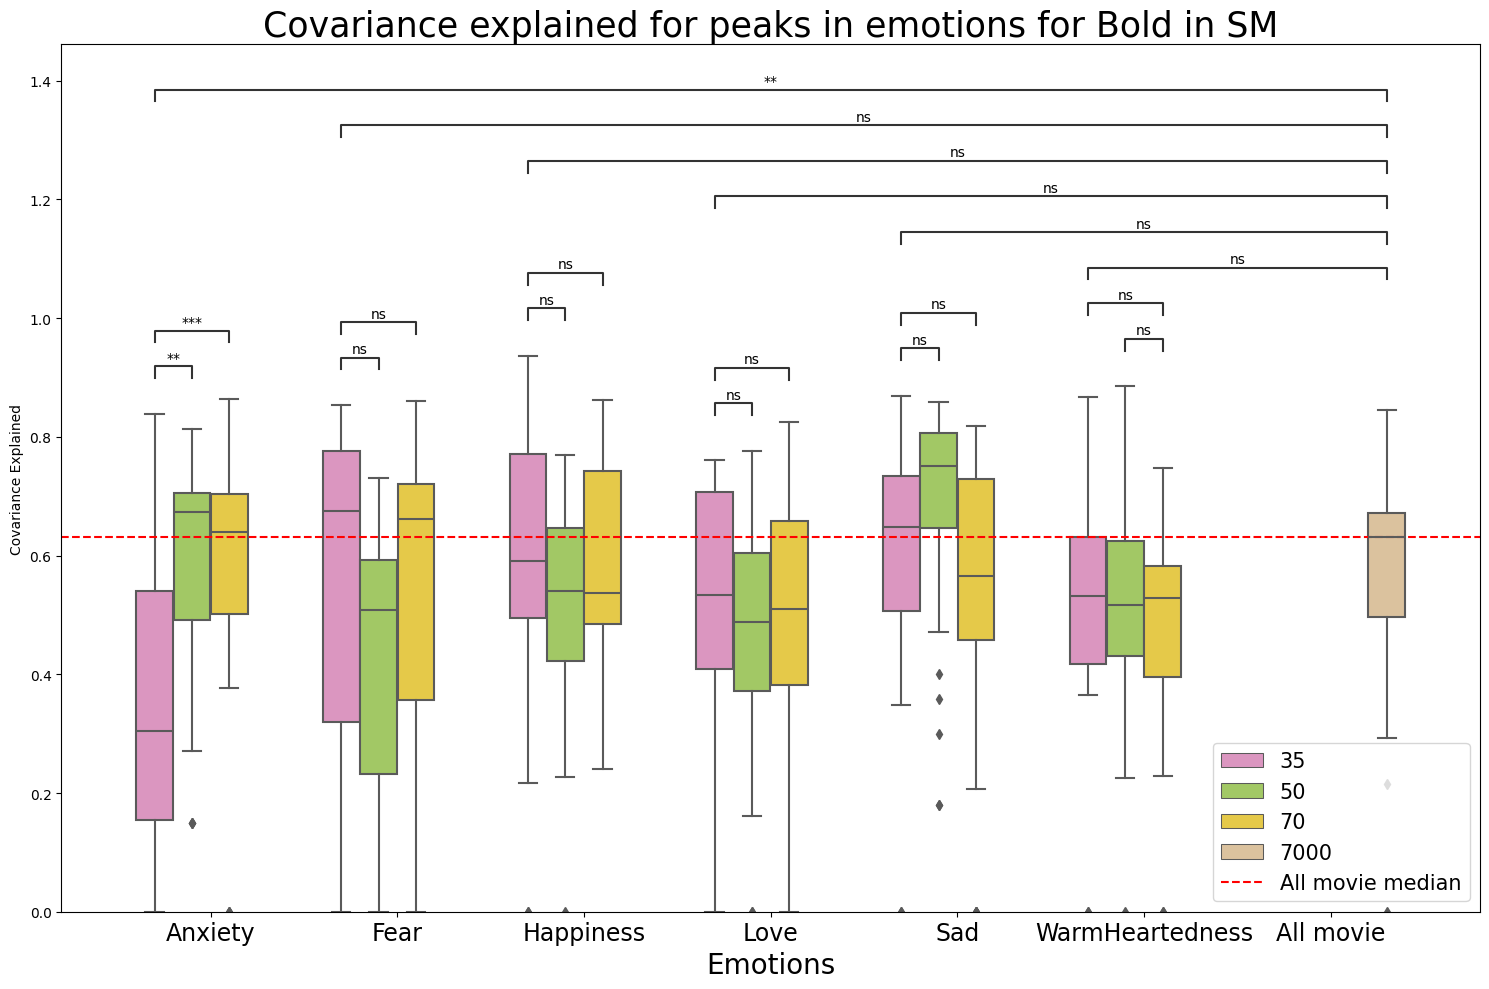

L
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.084e-02 Stat=1.340e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.643e-02 (ns) Stat=1.170e+02
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.263e-01 Stat=2.080e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:5.226e-02 Stat=1.380e+02
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:4.172e-01 Stat=1.800e+02
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.546e-02 (ns) Stat=1.160e+02
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benj

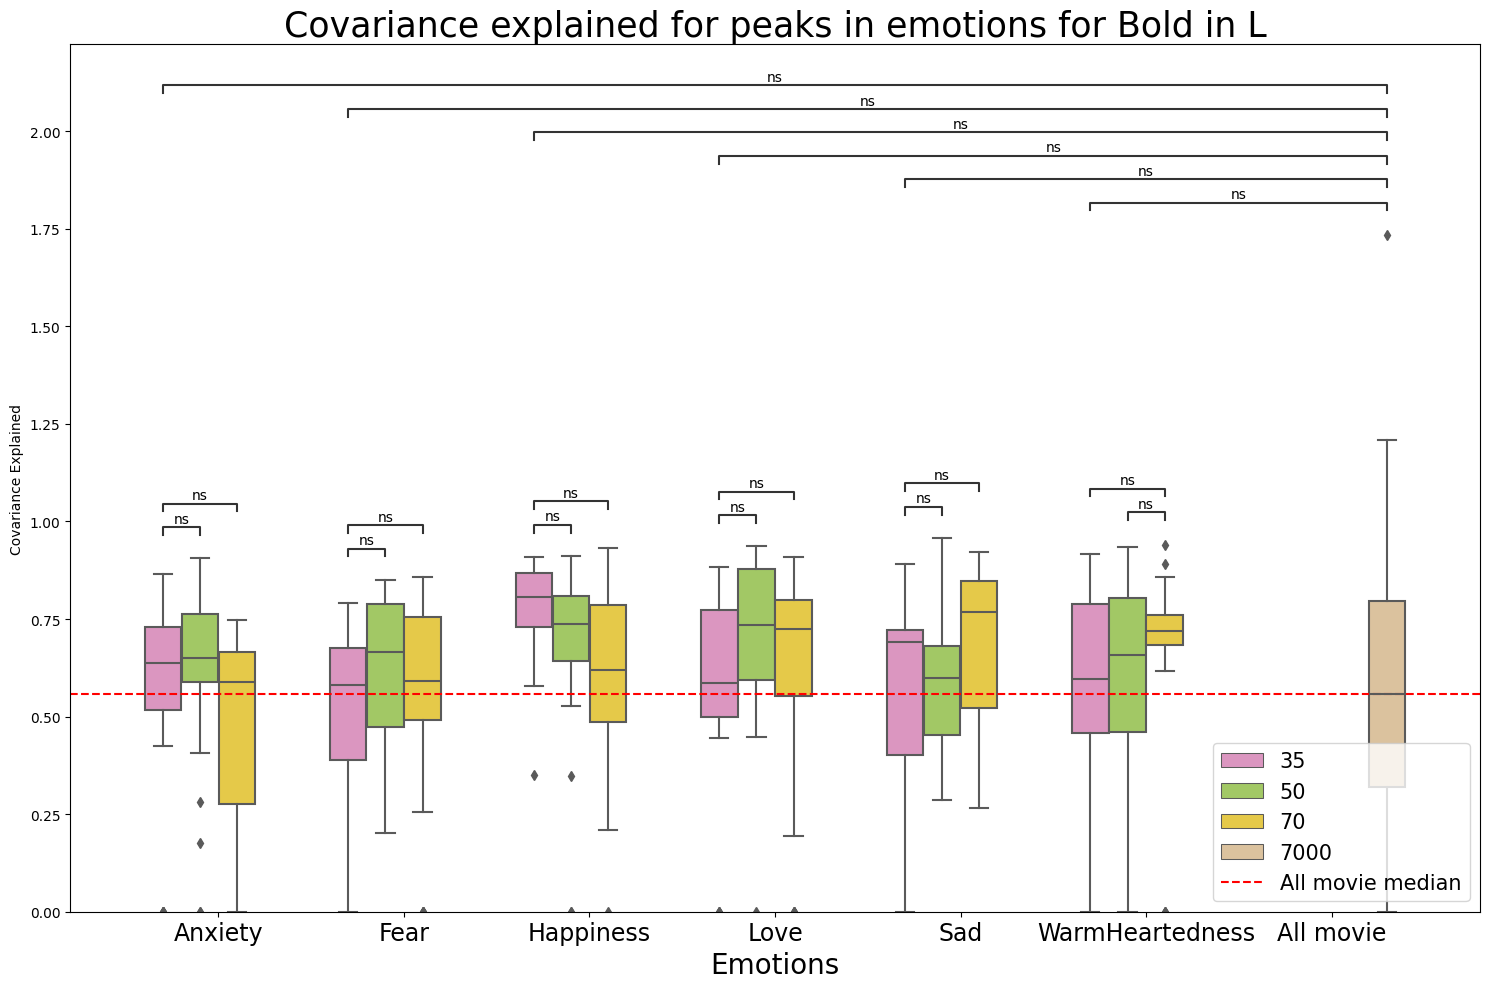

SC
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.745e-02 (ns) Stat=1.180e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.773e-02 (ns) Stat=7.300e+01
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.303e-01 Stat=2.150e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:4.400e-01 Stat=1.940e+02
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.236e-01 Stat=2.210e+02
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:6.129e-02 Stat=1.310e+02
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benj

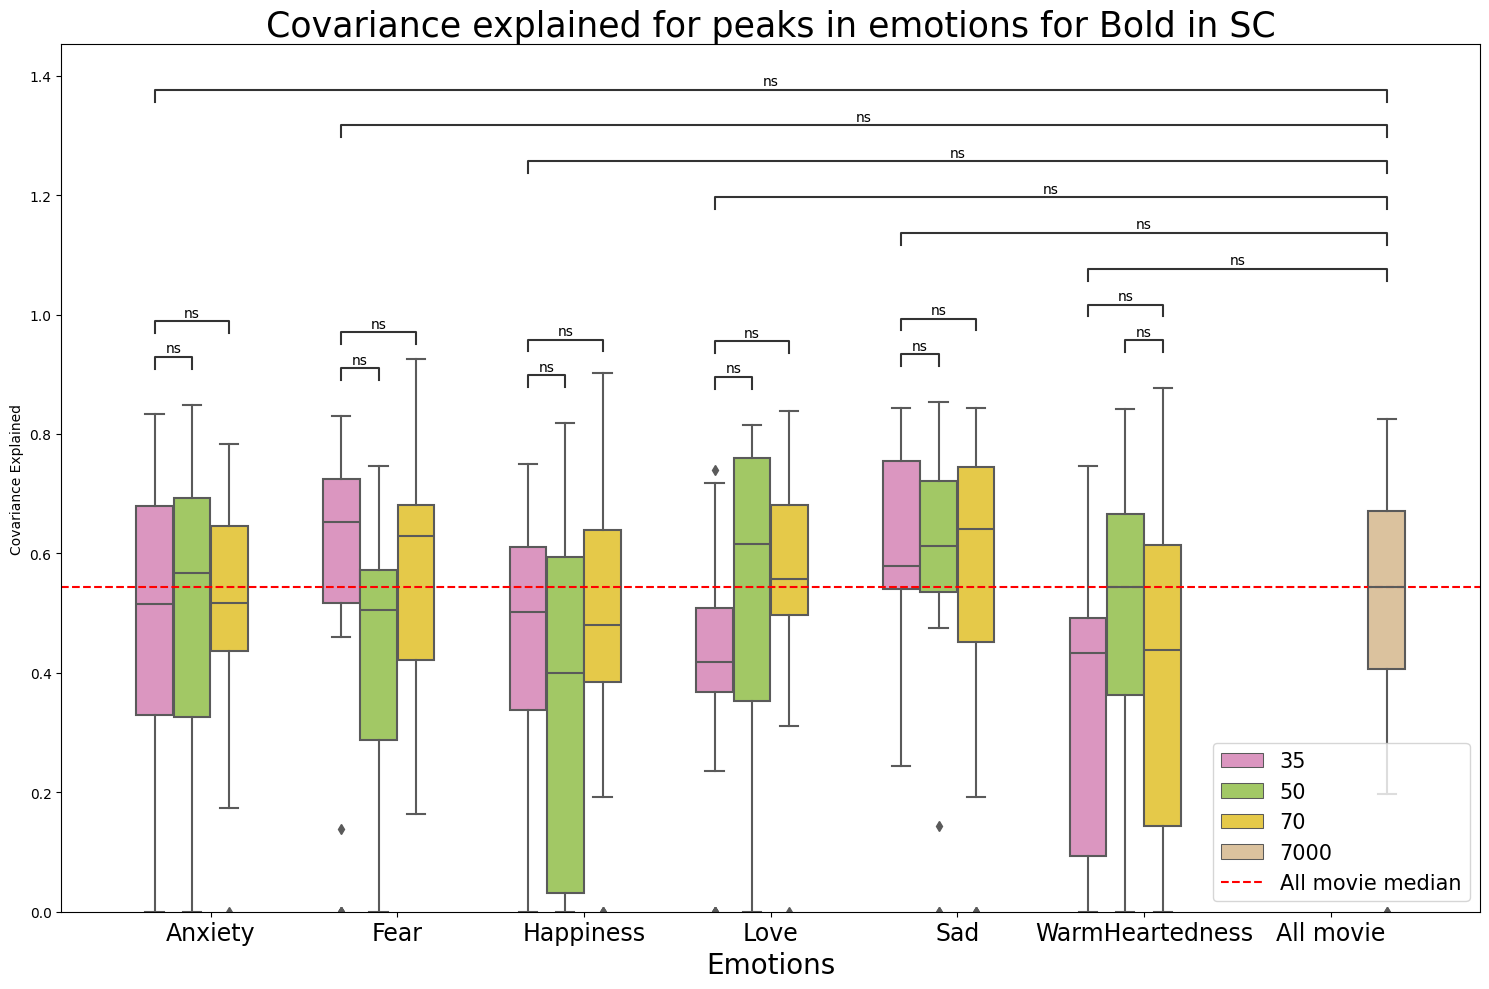

VA
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.000e-01 Stat=2.130e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.142e-01 Stat=1.550e+02
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.966e-02 (ns) Stat=1.200e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.206e-01 Stat=1.720e+02
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.206e-01 Stat=1.720e+02
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.928e-01 Stat=1.780e+02
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benjamini

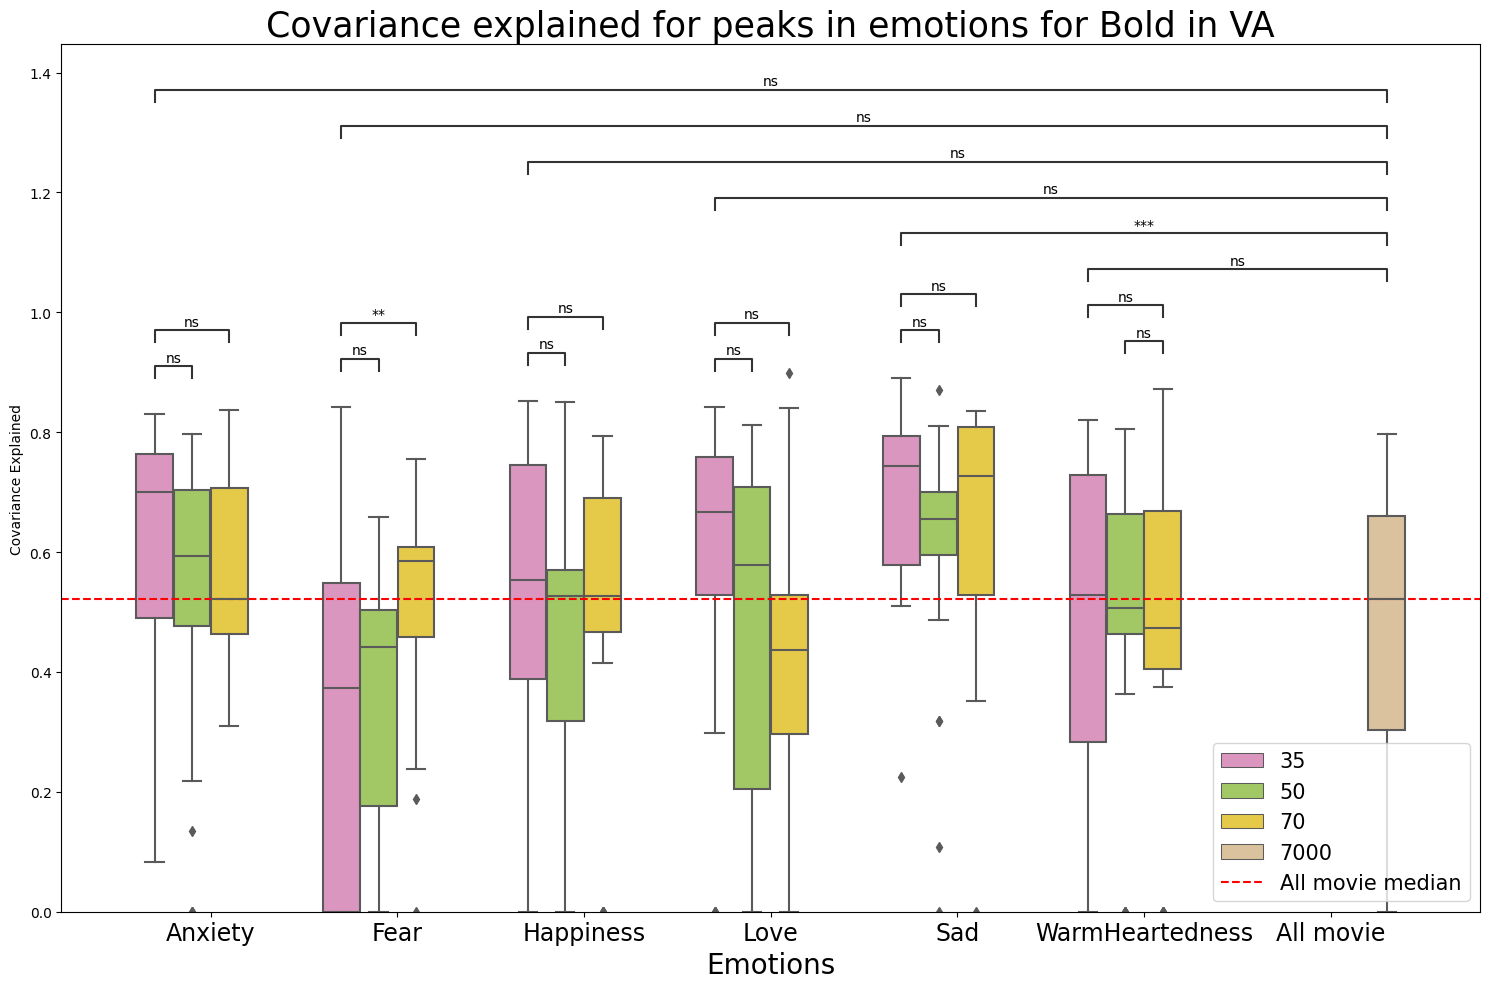

DMN
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:8.290e-01 Stat=1.670e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:4.918e-03 Stat=7.200e+01
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.151e-01 Stat=2.140e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:5.013e-03 Stat=9.900e+01
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.460e-01 Stat=1.610e+02
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.853e-02 Stat=1.190e+02
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benjamini-Hoch

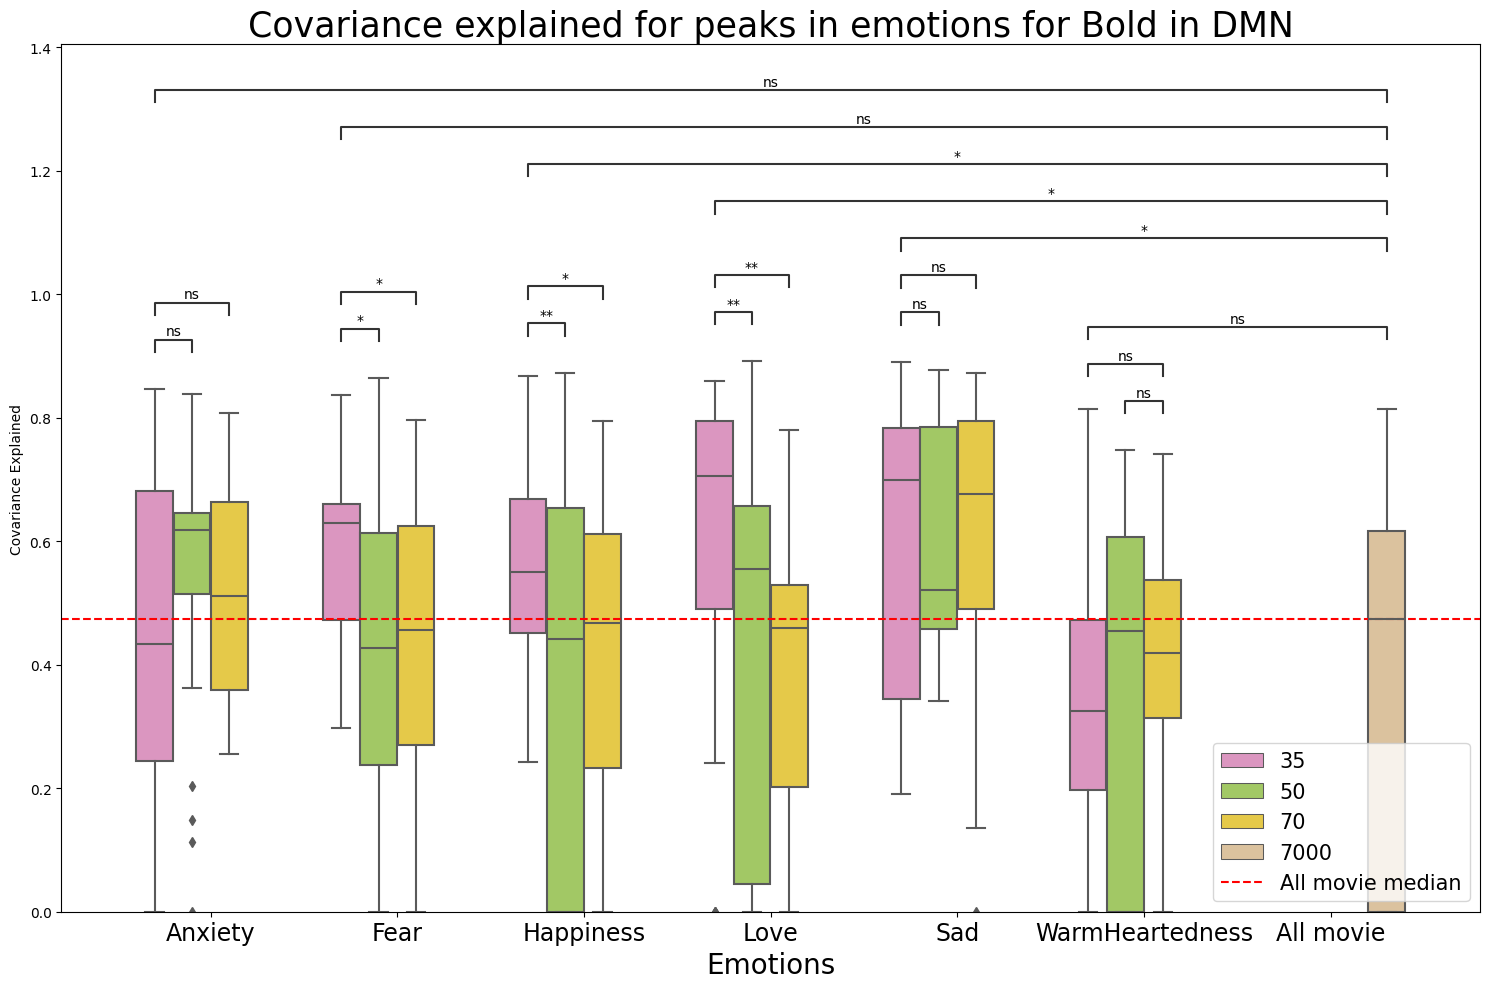

VIS
The shape of the significant_peaks is:  (540, 6)
The shape of the significant_all_movie is:  (30, 6)


/Users/silviaromanato/Desktop/HigherOrder/ambienteSilvia/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WarmHeartedness_50 vs. WarmHeartedness_70: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:4.659e-01 Stat=1.710e+02
Love_35 vs. Love_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:7.611e-01 Stat=2.170e+02
Sad_35 vs. Sad_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:3.599e-01 Stat=1.870e+02
Happiness_35 vs. Happiness_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:2.054e-01 Stat=1.700e+02
Anxiety_35 vs. Anxiety_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:1.048e-01 Stat=1.530e+02
Fear_35 vs. Fear_50: Wilcoxon test (paired samples) with Benjamini-Hochberg correction, P_val:9.515e-01 Stat=2.290e+02
Sad_35 vs. Sad_70: Wilcoxon test (paired samples) with Benjamini-Hoch

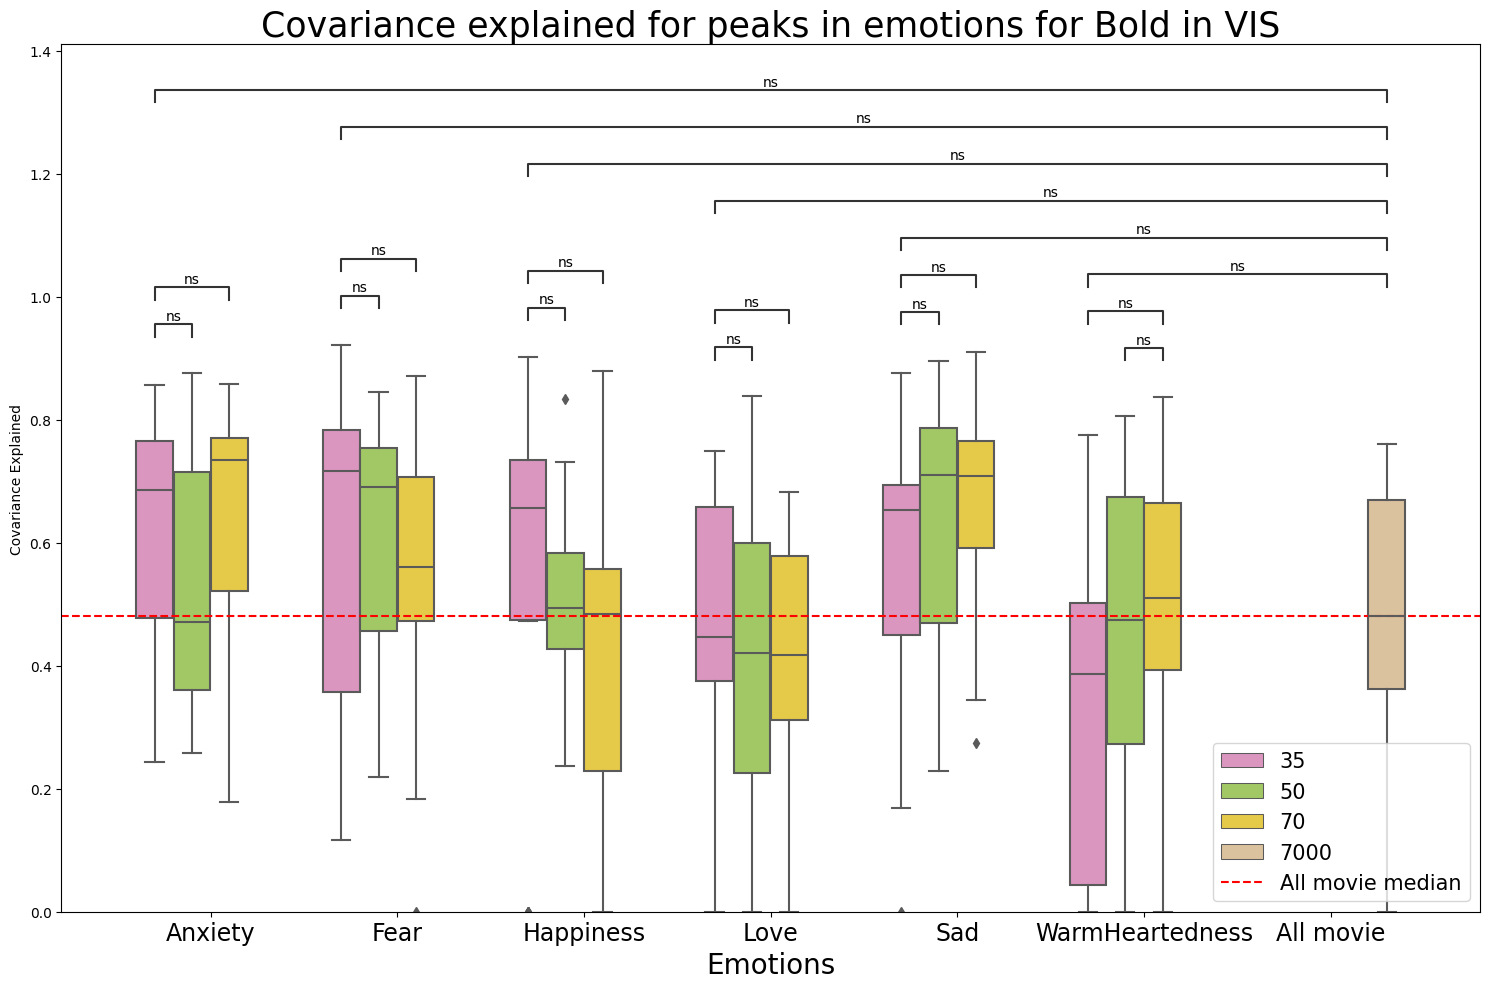

In [15]:
saving = False                  # True if you want to save the stats_df

MOVIE = 'Spaceman'
regions = ['DA', 'FP','SM', 'L', 'SC', 'VA', 'DMN', 'VIS']
method = 'bold'             # choose between 'scaffold' and 'triangles' and 'bold'

pairs = [
    (('Anxiety', 70), ('Anxiety', 35)), (('Anxiety', 50), ('Anxiety', 35)),
    (('Fear', 70), ('Fear', 35)), (('Fear', 50), ('Fear', 35)),
    (('Happiness', 70), ('Happiness', 35)), (('Happiness', 50), ('Happiness', 35)),
    (('Love', 70), ('Love', 35)), (('Love', 50), ('Love', 35)),
    (('Sad', 70), ('Sad', 35)), (('Sad', 50), ('Sad', 35)),
    (('WarmHeartedness', 70), ('WarmHeartedness', 50)), (('WarmHeartedness', 70), ('WarmHeartedness', 35)),
    (('Anxiety', 35), ('All movie', 7000)), 
    (('Fear', 35), ('All movie', 7000)),
    (('Happiness', 35), ('All movie', 7000)),
    (('Love', 35), ('All movie', 7000)),
    (('Sad', 35), ('All movie', 7000)),
    (('WarmHeartedness', 35), ('All movie', 7000))
    ]

stats_df = pd.DataFrame(columns=['Method', 'Region', 'Annotations', 'Comparisons', 'Movie'])
for region in regions:
    print(region)

    # Adjustments of pairs to data missing in tirangles SM and scaffold SC
    if (method, region) in [('triangles', 'SM'), ('scaffold', 'SC')]:
        pairs = [x for x in pairs if x not in [(('Love', 50), ('Love', 35)), (('Love', 70), ('Love', 35)), (('Love', 35), ('All movie', 7000))]]
        pairs.extend([(('Love', 50), ('All movie', 7000)), (('Love', 70), ('Love', 50))])

    ######### PEAKS DATA #########
    if method == 'bold':
        peaks_data = pd.read_csv(PATH_USER_OUTPUT + 'peaks/Bold/PLSpeaks_emotions_single_pts_fn.csv')
        peaks_data['Method'] = 'bold'
        peaks_data = peaks_data[peaks_data['Region'] == region]
    else:
        peaks_data = pd.read_csv(PATH_USER_OUTPUT + f'peaks/{method.capitalize()}/PLSpeaks_emotions_single_{method}_{region}_pts.csv')

    peaks_data = peaks_data[(peaks_data['Movie'] == MOVIE) & (peaks_data['Region'] == region) & (peaks_data['Method'] == method)]
    
    ########### DATA ALL ###########
    data_all = pd.read_csv(PATH_USER_OUTPUT + f'PLS/{method.capitalize()}/PLS_{method}_{region}_bootstrap_results.csv', index_col=0).reset_index()
    data_all['Number of points'] = 7000
    data_all['Feature'] = 'All movie'
    data_all['threshold'] = 1
    data_all['bootstrap_round'] = data_all.index // 12
    data_all = data_all[data_all['Movie'] == 'Spaceman']
    
    ########### SIGNIFICANT ###########
    # Control that multiple bootstrap rounds are not present
    peaks_data = peaks_data.groupby(['Region', 'bootstrap_round', 'Feature', 'Number of points', 'threshold', 'LC', 'Method', 'Movie']).last().reset_index()
    significant = retrieve_significant(peaks_data, data_all, number_lines=30)
    significant = significant[significant['Number of points'].isin([70,50,35,7000])]

    ########## PLOTS ##########
    # plot_peaks_pts(significant, [70, 50, 35])
    stats_df = annotations_plot(significant, order_emotions= list(significant['Feature'].unique()), pairs = pairs, order_hue = None, on = 'Number of points', title = f'Covariance explained for peaks in emotions for {method.capitalize()} in {region}',
                 stats_df = stats_df, region = region, method = method, movie = MOVIE)
    if saving == True:
        stats_df.to_csv(PATH_USER_OUTPUT + f'peaks/Statistics/stats_df_{method}.csv')

In [16]:

stats_df

,Method,Region,Annotations,Comparisons,Movie
0,bold,DA,ns,"((Anxiety, 70), (Anxiety, 35))",Spaceman
1,bold,DA,ns,"((Anxiety, 50), (Anxiety, 35))",Spaceman
2,bold,DA,ns,"((Fear, 70), (Fear, 35))",Spaceman
3,bold,DA,ns,"((Fear, 50), (Fear, 35))",Spaceman
4,bold,DA,ns,"((Happiness, 70), (Happiness, 35))",Spaceman
...,...,...,...,...,...
13,bold,VIS,ns,"((Fear, 35), (All movie, 7000))",Spaceman
14,bold,VIS,ns,"((Happiness, 35), (All movie, 7000))",Spaceman
15,bold,VIS,ns,"((Love, 35), (All movie, 7000))",Spaceman
16,bold,VIS,ns,"((Sad, 35), (All movie, 7000))",Spaceman
